In [2]:
#!pip install fedot

In [3]:
import os
os.environ["MKL_NUM_THREADS"] = "4"
os.environ["NUMEXPR_NUM_THREADS"] = "4"
os.environ["OMP_NUM_THREADS"] = "4"

import torch
torch.set_num_threads(4)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
logging.raiseExceptions = False

import fedot
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import TsForecastingParams, Task, TaskTypesEnum
import inspect

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
ts_tabular =pd.read_csv('ts study 1.txt')
ts_real_temp = ts_tabular[ts_tabular['label']=='temp'].drop('label',axis=1)['value'].to_numpy()

In [5]:
def s1(n,noise = 3,sign=1):
    def f1(x):
        return 5*np.sin(x/20)+0.1*x-2*np.sqrt(x)
    trend = f1(np.array(range(n)))
    noise = np.random.normal(loc = 0, scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend' : trend*sign}
    return ans
def s2(length, periods = 10,noise = 0.3,sign=1 ):

    sinusoidal_data = np.linspace(-periods * np.pi, periods * np.pi, length)
    sinusoidal_data = np.sin(sinusoidal_data)
    cos_1_data = np.linspace(-periods * np.pi/2, periods/2 * np.pi/2, int(length/2))
    cos_1_data = np.cos(cos_1_data) 
    cos_2_data = np.linspace(periods/2 * np.pi/2, periods * np.pi/2, int(length/2))
    cos_2_data = np.cos(cos_2_data)   
    cosine_data = np.hstack((cos_1_data, cos_2_data))
    
    random_noise = np.random.normal(loc=0.0, scale=noise, size=length)
    synthetic_data = sinusoidal_data + cosine_data + random_noise
    ans = {'ts':synthetic_data*sign, 'trend': (sinusoidal_data + cosine_data)*sign}
    return ans
def s3(n,noise = 10,sign = 1):
    r = np.array(range(n))
    trend = (r-r/5*np.sin(r/2)+r/2*np.sin(r/20))/10
    noise = np.random.normal(loc=0,scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend': trend*sign}
    return ans
def s4(n,noise = 1,sign =1):
    array = np.array(range(n))
    trend = array/5+np.power(array,0.5)*np.sin(np.pi/12*array)
    noise = np.random.normal(loc = 0,scale = noise, size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign, 'trend' : trend*sign}
    return ans

def s5(n,noise = 1,sign=1):
    r= np.arange(n)
    trend = r*1
    noise = np.random.normal(loc=0,scale = noise,size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign,'trend':trend*sign}
    return ans

def s6(n,noise = 1, sign =1):
    r = np.arange(n)
    trend = 2*np.sin(2*r)+np.cos(r)
    noise = np.random.normal(loc = 0,scale  = noise,size = n)
    ts = trend+noise
    ans = {'ts':ts,'trend':trend}
    return ans

In [16]:
horizon = 25
validation_blocks = 2
task = Task(TaskTypesEnum.ts_forecasting,  TsForecastingParams(forecast_length=horizon))
start = 0
end = 1000
series = 3

if series == 'traffic':
    init_series = ts_real_temp
    ts = init_series[start:end]
    trend = None
    ts_test = init_series[end:end+horizon]
    trend_test = None
    idx = np.array(range(len(np.array(ts))))

if series ==1:
    noise = 0.5
    init_series = s1(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)

    
if series ==2:
    noise = 0.5
    init_series = s2(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    
if series ==3:
    noise = 0.5
    init_series = s3(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    
if series ==4:
    noise = 0.5
    init_series = s4(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
  
if series ==5:
    noise = 0.5
    init_series = s5(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    

if series ==6:
    noise = 0.5
    init_series = s6(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    

train_data, test_data = train_test_data_setup(train_input, validation_blocks=2)

# init model for the time series forecasting
model = Fedot(problem='ts_forecasting',
                  safe_mode = True,
                  task_params=task.task_params,
                  timeout=3,
                  n_jobs=-1,
                  cv_folds=2, 
                  validation_blocks=2, 
                  preset='stable',
                  with_tuning = False,
                  max_depth = 5,
                  num_of_generations  =3 ,
                  logging_level = 10,
                 show_progress =True)

In [14]:
inspect.getmembers(model)

[('__class__', fedot.api.main.Fedot),
 ('__delattr__',
  <method-wrapper '__delattr__' of Fedot object at 0x7f64b5cef150>),
 ('__dict__',
  {'metrics': <fedot.api.api_utils.metrics.ApiMetrics at 0x7f64b5c14910>,
   'api_composer': <fedot.api.api_utils.api_composer.ApiComposer at 0x7f64b5c14150>,
   'params': <fedot.api.api_utils.params.ApiParams at 0x7f64b5c14f10>,
   'data_processor': <fedot.api.api_utils.api_data.ApiDataProcessor at 0x7f64b8e25ad0>,
   'data_analyser': <fedot.api.api_utils.api_data_analyser.DataAnalyser at 0x7f64b5d3df50>,
   'target': None,
   'prediction': None,
   'train_data': None,
   'test_data': None,
   'current_pipeline': None,
   'best_models': (),
   'history': None}),
 ('__dir__', <function Fedot.__dir__()>),
 ('__doc__',
  "Main class for FEDOT API.\n\n    Facade for ApiDataProcessor, ApiComposer, ApiMetrics, ApiInitialAssumptions.\n\n    Args:\n        problem: the name of modelling problem to solve\n\n            .. details:: possible ``problem`` optio

INFO:root:AssumptionsHandler - Initial pipeline fitting started


2022-11-22 15:28:29,380 - AssumptionsHandler - Initial pipeline fitting started


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-11-22 15:28:29,386 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 15:28:29,393 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-11-22 15:28:29,397 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 15:28:29,400 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: lagged


2022-11-22 15:28:29,404 - PrimaryNode - Trying to fit primary node with operation: lagged


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: glm


2022-11-22 15:28:29,514 - PrimaryNode - Trying to fit primary node with operation: glm


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 15:28:29,638 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 15:28:29,644 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 15:28:29,651 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 15:28:29,654 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-11-22 15:28:29,657 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:root:PrimaryNode - Predict in primary node by operation: glm


2022-11-22 15:28:29,663 - PrimaryNode - Predict in primary node by operation: glm


INFO:root:AssumptionsHandler - Initial pipeline was fitted successfully


2022-11-22 15:28:29,669 - AssumptionsHandler - Initial pipeline was fitted successfully


CRITICAL:root:ApiComposer - Initial pipeline was fitted in 0.3 sec.


2022-11-22 15:28:29,672 - ApiComposer - Initial pipeline was fitted in 0.3 sec.


CRITICAL:root:ApiComposer - AutoML configured. Parameters tuning: False Time limit: 3 min Set of candidate models: ['normalization', 'ets', 'ridge', 'ar', 'polyfit', 'treg', 'adareg', 'ransac_lin_reg', 'glm', 'diff_filter', 'lasso', 'ransac_non_lin_reg', 'linear', 'cut', 'smoothing', 'clstm', 'lgbmreg', 'locf', 'gbr', 'isolation_forest_reg', 'sparse_lagged', 'ts_naive_average', 'gaussian_filter', 'rfr', 'scaling', 'lagged', 'fast_ica', 'pca', 'dtreg', 'sgdr', 'poly_features']


2022-11-22 15:28:29,687 - ApiComposer - AutoML configured. Parameters tuning: False Time limit: 3 min Set of candidate models: ['normalization', 'ets', 'ridge', 'ar', 'polyfit', 'treg', 'adareg', 'ransac_lin_reg', 'glm', 'diff_filter', 'lasso', 'ransac_non_lin_reg', 'linear', 'cut', 'smoothing', 'clstm', 'lgbmreg', 'locf', 'gbr', 'isolation_forest_reg', 'sparse_lagged', 'ts_naive_average', 'gaussian_filter', 'rfr', 'scaling', 'lagged', 'fast_ica', 'pca', 'dtreg', 'sgdr', 'poly_features']


CRITICAL:root:ApiComposer - Pipeline composition started.


2022-11-22 15:28:29,719 - ApiComposer - Pipeline composition started.


INFO:root:DataSourceSplitter - K-folds cross validation is applied.


2022-11-22 15:28:29,723 - DataSourceSplitter - K-folds cross validation is applied.


Generations:  33%|███▎      | 1/3 [00:00<?, ?gen/s]INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-11-22 15:28:29,730 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 1


2022-11-22 15:28:30,322 - EvoGraphOptimizer - Generation num: 1


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 2.98891695020708, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


2022-11-22 15:28:30,328 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 2.98891695020708, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


INFO:root:EvoGraphOptimizer - no improvements for 0 iterations


2022-11-22 15:28:30,333 - EvoGraphOptimizer - no improvements for 0 iterations


INFO:root:EvoGraphOptimizer - spent time: 0.0 min


2022-11-22 15:28:30,337 - EvoGraphOptimizer - spent time: 0.0 min


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-11-22 15:28:31,699 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 2


2022-11-22 15:30:17,767 - EvoGraphOptimizer - Generation num: 2


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 2.968107361813739, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.7}]


2022-11-22 15:30:17,771 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 2.968107361813739, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.7}]


INFO:root:EvoGraphOptimizer - no improvements for 0 iterations


2022-11-22 15:30:17,776 - EvoGraphOptimizer - no improvements for 0 iterations


INFO:root:EvoGraphOptimizer - spent time: 1.8 min


2022-11-22 15:30:17,779 - EvoGraphOptimizer - spent time: 1.8 min


INFO:root:EvoGraphOptimizer - Next population size: 34; max graph depth: 5


2022-11-22 15:30:17,784 - EvoGraphOptimizer - Next population size: 34; max graph depth: 5


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-11-22 15:30:18,669 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 3


2022-11-22 15:31:49,434 - EvoGraphOptimizer - Generation num: 3


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 1.5412141035536209, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


2022-11-22 15:31:49,443 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 1.5412141035536209, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


INFO:root:EvoGraphOptimizer - no improvements for 0 iterations


2022-11-22 15:31:49,452 - EvoGraphOptimizer - no improvements for 0 iterations


INFO:root:EvoGraphOptimizer - spent time: 3.3 min


2022-11-22 15:31:49,458 - EvoGraphOptimizer - spent time: 3.3 min


CRITICAL:root:GroupedCondition - Optimisation stopped: Time limit is reached


2022-11-22 15:31:49,464 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:  33%|███▎      | 1/3 [03:19<?, ?gen/s]
INFO:root:OptimisationTimer - Composition time: 3.329 min


2022-11-22 15:31:49,473 - OptimisationTimer - Composition time: 3.329 min


INFO:root:OptimisationTimer - Algorithm was terminated due to processing time limit


2022-11-22 15:31:49,477 - OptimisationTimer - Algorithm was terminated due to processing time limit


INFO:root:GPComposer - GP composition finished


2022-11-22 15:31:49,485 - GPComposer - GP composition finished


CRITICAL:root:ApiComposer - Model generation finished


2022-11-22 15:31:49,756 - ApiComposer - Model generation finished


CRITICAL:root:FEDOT logger - Final pipeline was fitted


2022-11-22 15:31:49,989 - FEDOT logger - Final pipeline was fitted


CRITICAL:root:FEDOT logger - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, locf, ridge, lagged]}


2022-11-22 15:31:49,997 - FEDOT logger - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, locf, ridge, lagged]}


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 15:31:50,006 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 15:31:50,015 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 15:31:50,024 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 15:31:50,032 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-11-22 15:31:50,037 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:root:PrimaryNode - Predict in primary node by operation: locf


2022-11-22 15:31:50,043 - PrimaryNode - Predict in primary node by operation: locf


2022-11-22 15:31:50,096 - OperationTypesRepository - Operation lagged not found in the repository


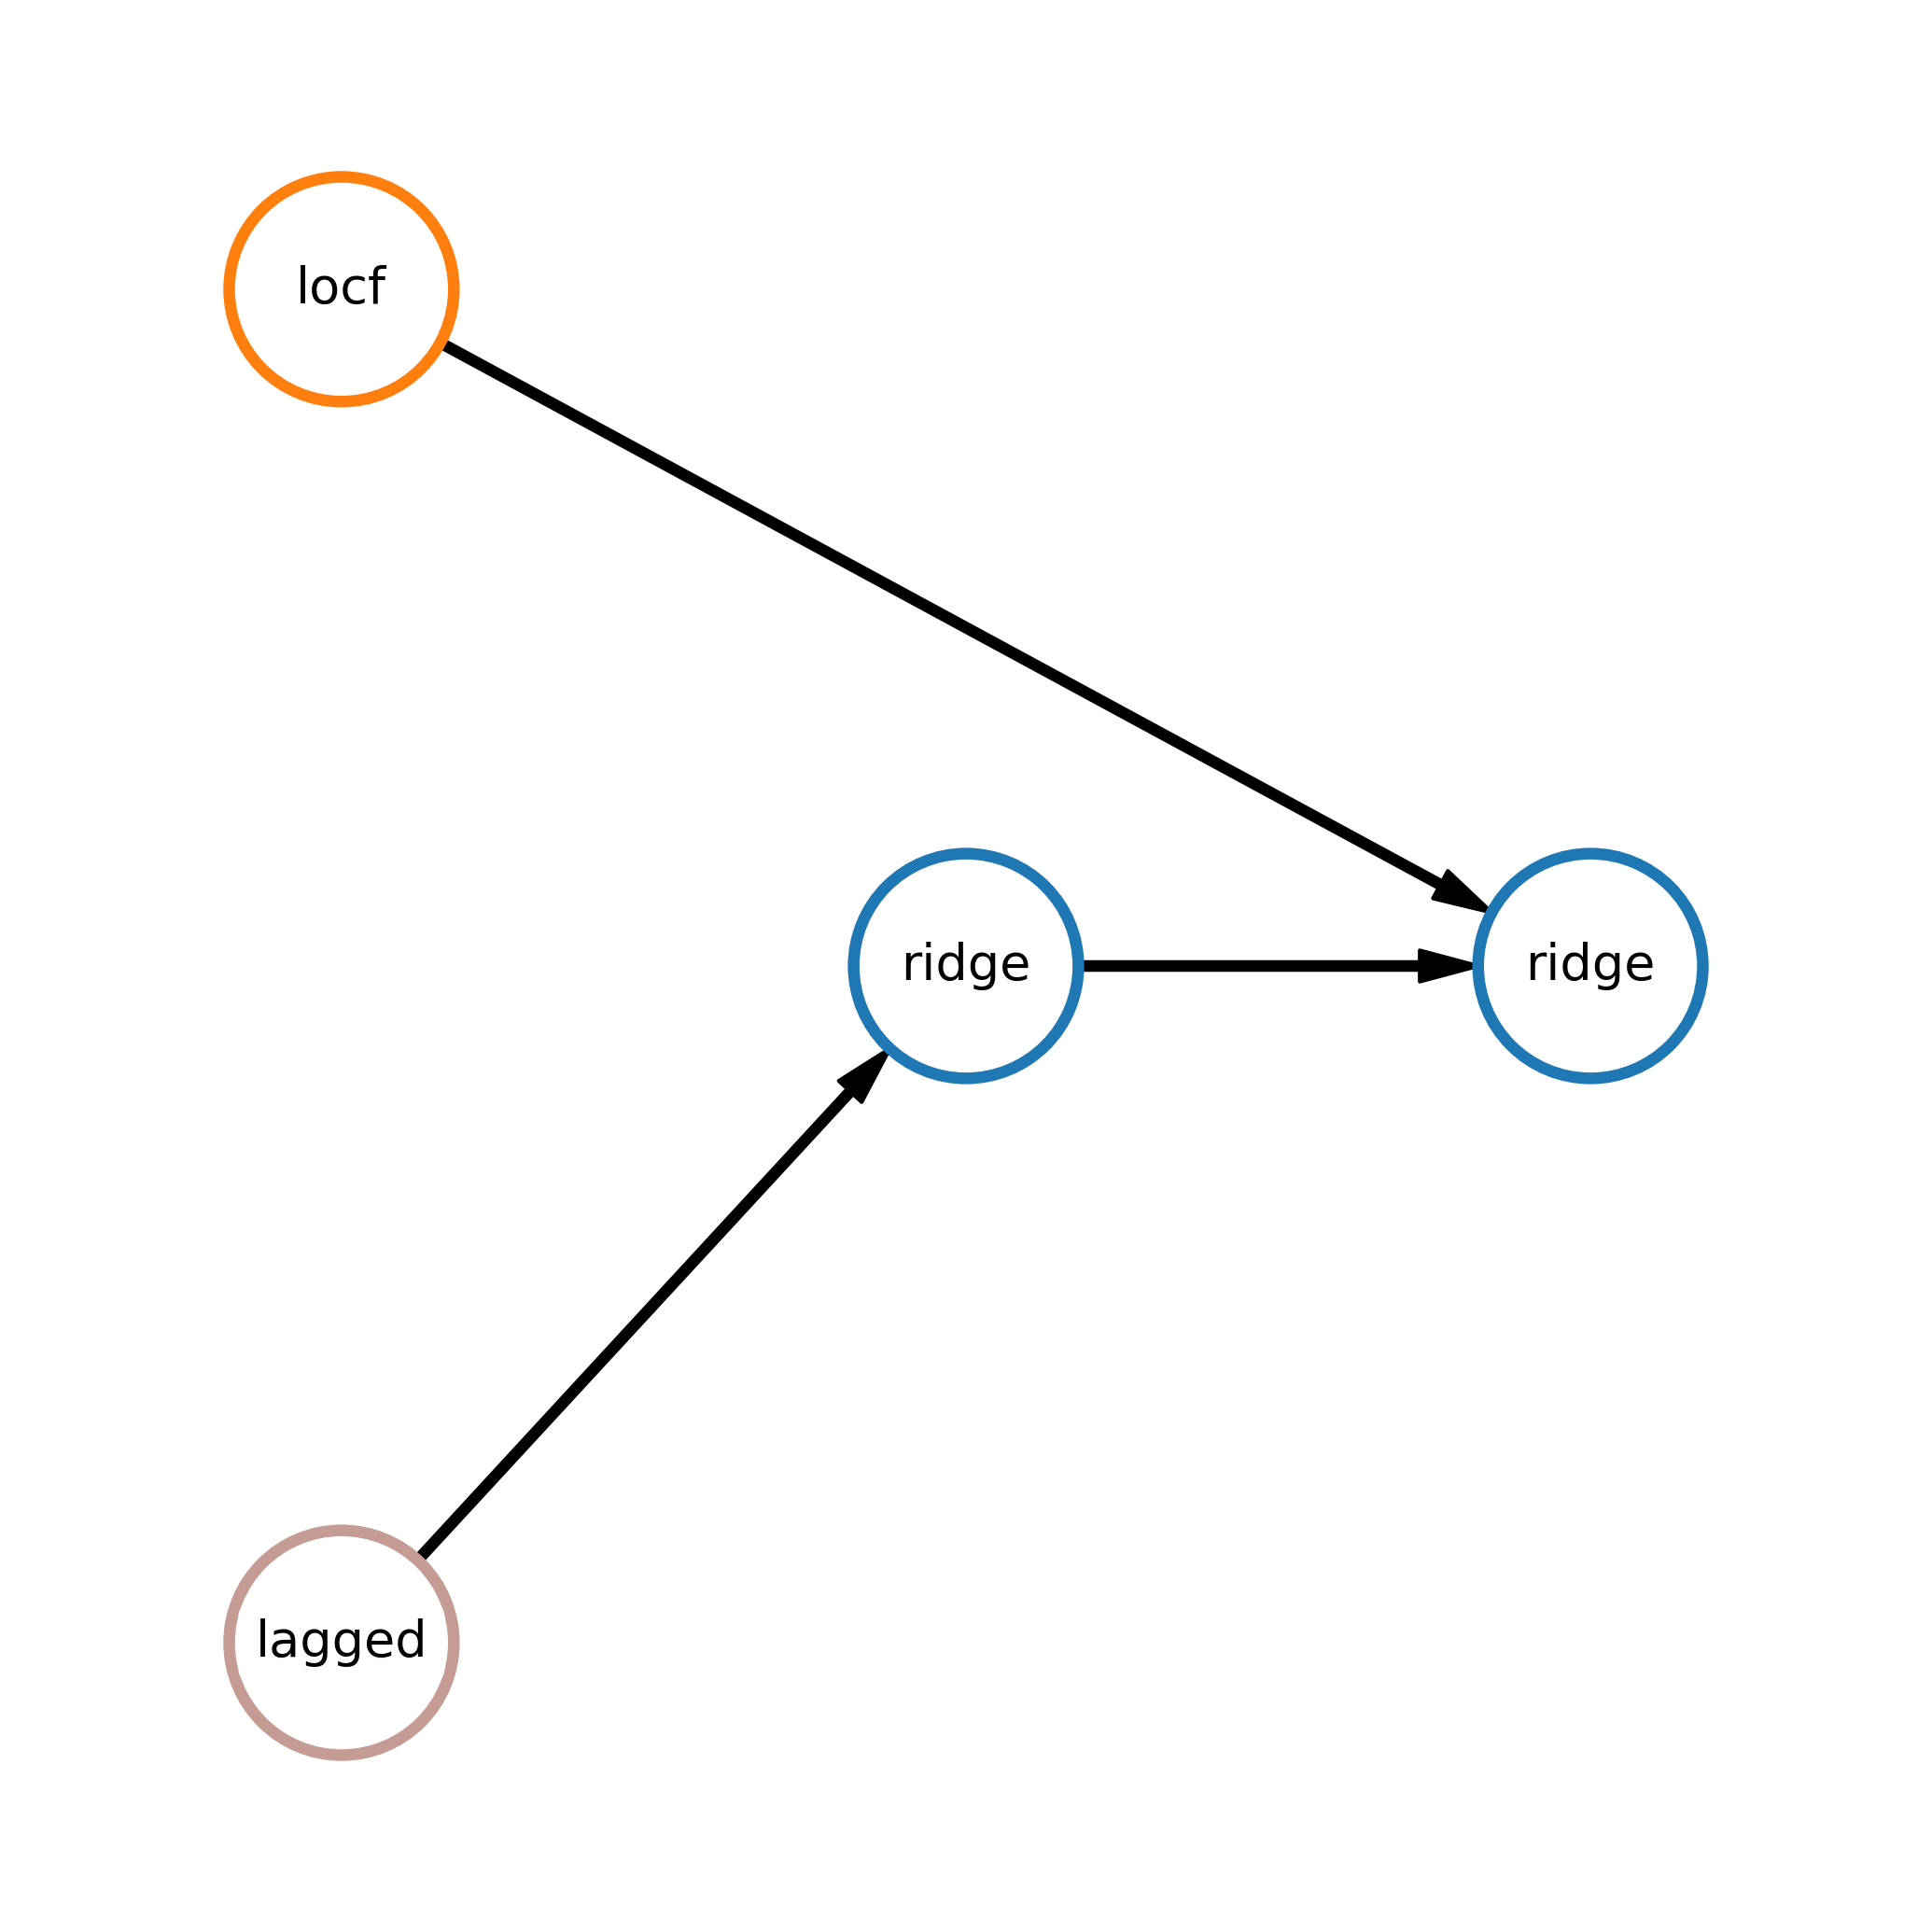

In [17]:
pipeline = model.fit(train_data)
forecast = model.forecast(test_data)
pipeline.show()

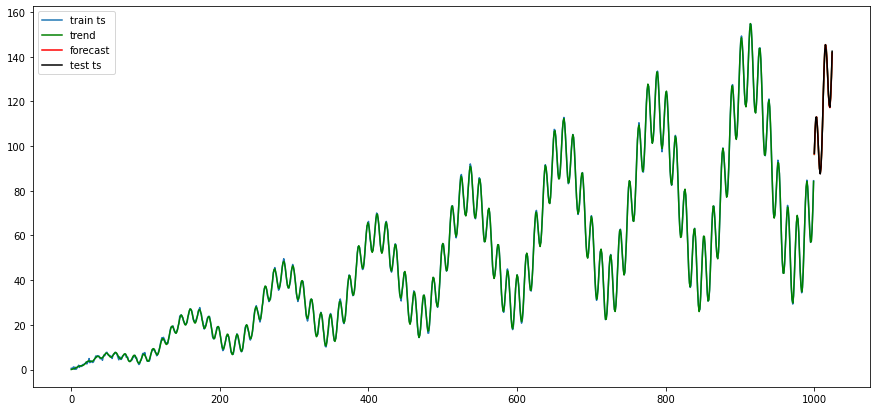

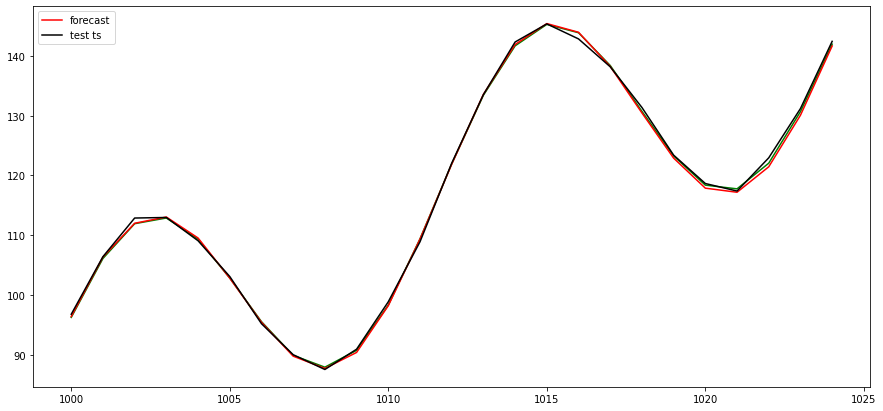

In [20]:
fig,ax  = plt.subplots()
fig.set(figwidth = 15,figheight = 7)
test_range = range(len(ts), len(ts)+len(ts_test))
test_range = range(end,end+horizon)
train_range = range(start,end)
total_range = range(start,end+horizon)

ax.plot(train_range,ts, label = 'train ts')
if trend is not None:
    ax.plot(train_range, trend,color = 'green',label = 'trend')
if trend_test is not None:
    ax.plot(test_range, trend_test,color = 'green')
ax.plot(test_range,forecast, color = 'red', label = 'forecast')
ax.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

fig1,ax1 = plt.subplots()
fig1.set(figwidth = 15,figheight = 7)

if trend_test is not None:
    ax1.plot(test_range, trend_test,color = 'green')
ax1.plot(test_range,forecast, color = 'red', label = 'forecast')
ax1.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

In [21]:
import sys
from sklearn.metrics import mean_squared_error as mse
from fedot.core.composer.metrics import QualityMetric
from fedot.core.data.data import InputData, OutputData
from fedot.core.repository.tasks import TsForecastingParams

def quantile_loss(y_true, y_pred, quantile=0.5):
    res = np.array(y_true)-np.array(y_pred)
    metrics=np.empty(shape = [0])
    for x in res:
        if x>=0:
            metrics = np.append(metrics, quantile*x)
        else:
            metrics = np.append(metrics,(quantile-1)*x)
    return np.mean(metrics)

class Quantile_Loss_1(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.1)
        return value


class Quantile_Loss_9(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.9)
        return value

In [22]:
#importing for tuning
from fedot.core.optimisers.adapters import PipelineAdapter
from fedot.core.pipelines.tuning.tuner_builder import TunerBuilder
from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum
from fedot.core.pipelines.tuning.tuner_interface import HyperoptTuner
from fedot.core.pipelines.tuning.unified import PipelineTuner
from fedot.core.optimisers.composer_requirements import ComposerRequirements
import datetime

from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum

#these parameters are the same for both tuners below
task = Task(TaskTypesEnum.ts_forecasting,TsForecastingParams(forecast_length=horizon))
composer_requirements = ComposerRequirements()
composer_requirements.validation_blocks = 2
composer_requirements.n_jobs= -1
composer_requirements.show_progress = True

#this tuner will be used to create lower confidence interval
low_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_1.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

#this tuner will be used to create uppper confidence interval
up_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_9.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-11-22 15:36:30,645 - DataSourceSplitter - Hold out validation is applied.


INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-11-22 15:36:30,654 - DataSourceSplitter - Hold out validation is applied.


In [23]:
def quantile_maker(quantile,arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    up = []
    low = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        q_up = np.quantile(x, 1-quantile)
        up.append(q_up)
        q_low = np.quantile(x,quantile)
        low.append(q_low)
    up = np.array(up)
    low = np.array(low)
    return {'up':up,'low':low}

def mean_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    average = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        average.append(x.mean())
    return average

def median_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    median = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        median.append(np.median(x))
    return median

def absolute_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    maximum = []
    minimum = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        maximum.append(np.max(x))
        minimum.append(np.min(x))
    return {'up':np.array(maximum),'low':np.array(minimum)}

from scipy.stats import trim_mean
def truncated_mean_maker(arrays, quantile=0.1):
    number_arrays = len(arrays)
    l = len(arrays[0])
    trunc_mean = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        trunc_mean.append(trim_mean(x, quantile))
    return np.array(trunc_mean)

In [24]:
def conf_int_maker(model = model,
                   train_ts = ts,
                   number_models = 10, 
                   pipelines_show= False):
    """
    model - a fedot model of interest
    train_ts - the ts used for training the model
    ts_test - the testing series; used for plotting and visualization of the results
    number_models - number of models used to create the confidence intervals
    regim - type of getting lower and upper confidence intervals from the upper and lower arrays; 
            default is 'quantile' also avaliable 'average' and 'median', 'absolute_bounds', 'truncated_mean'
    plot - boolean parameter indicating wheter to show plot of the forecast and confidence intervals
    plot_history - boolean parameter indicating whether to show previous series
    """
    
    horizon = model.params.task.task_params.forecast_length
    train_data = model.train_data
    test_data = model.test_data
    forecast = model.predict(test_data)

    #4 lines below allow us take the best models
    fits = []
    for ind in model.history.individuals[-1]:
        fits.append(ind.fitness.value)
    fits = np.sort(np.array(fits))

    #create up and low predictions
    up_predictions = []
    low_predictions = []
    
    s=1
    for ind in model.history.individuals[-1]:
        if ind.fitness.value<=fits[number_models]:
            pipeline = PipelineAdapter().restore(ind.graph)
            print(f'Fitting pipeline №{s}')
            s+=1
            if pipelines_show:
                pipeline.show()
            
            
            #tuning upper confidence interval
            tuned_pipeline = up_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            up_predictions.append(preds)
            del tuned_pipeline
            
            #tuning lower confidence interval
            tuned_pipeline = low_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            low_predictions.append(preds)
            del tuned_pipeline
    return {'up_predictions':up_predictions, 'low_predictions':low_predictions}

In [25]:
def conf_int_plotting(up_predictions,
                      low_predictions,
                      horizon=horizon,
                      forecast=forecast,
                      ts=ts,
                      ts_test=ts_test,
                      trend_test=trend_test,
                      regim = 'quantile',
                      plot_history = True,
                      plot_up_int = True,
                      plot_low_int = True,
                      plot_trend = True,
                      plot_forecast = True,
                      plot_upper_train = True,
                      plot_lower_train = True,
                      plot_ts_test = True):
    if regim == 'quantile':
        up_res= quantile_maker(quantile = 0.1, arrays = up_predictions)['up']
        low_res= quantile_maker(quantile = 0.1, arrays = low_predictions)['low']
    if regim == 'mean':
        up_res = mean_maker(arrays = up_predictions)
        low_res = mean_maker(arrays = low_predictions)
    if regim == 'median':
        up_res = median_maker(arrays = up_predictions)
        low_res = median_maker(arrays = low_predictions)
    if regim == 'absolute_bounds':
        up_res = absolute_maker(arrays = up_predictions)['up']
        low_res = absolute_maker(arrays = low_predictions)['low']
    if regim == 'truncated_mean':
        up_res = truncated_mean_maker(arrays = up_predictions)
        low_res = truncated_mean_maker(arrays = low_predictions)
    
    up = np.maximum(up_res,forecast)  
    low = np.minimum(low_res,forecast)

    r = range(1,horizon+1)
    fig,ax = plt.subplots()
    fig.set(figwidth = 15,figheight = 7)
    for i in range(len(up_predictions)):
        if i==0:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow',label = 'preds for up train')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink',label = 'preds for low train')
        else:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink')    
    if plot_up_int:
        ax.plot(r,up, color = 'blue', label  = 'Up',marker= '.')
    if plot_low_int:
        ax.plot(r,low, color = 'green', label  = 'Low',marker = '.')
    if plot_forecast:
        ax.plot(r,forecast, color = 'red', label = 'Forecast')
    if ts_test is not None:
        if plot_ts_test:
            ax.plot(r,ts_test,color = 'black', label = 'Actual TS')
    if trend_test is not None:
        if plot_trend:
            ax.plot(r, trend_test, color = 'magenta', label = 'True Trend')
    plt.legend()
    if plot_history:
        fig1,ax1 = plt.subplots()
        
        fig1.set(figwidth = 15,figheight = 7)
       
        train_range = range(len(ts))
        test_range = range(len(ts),len(ts)+horizon)
        
        ax1.plot(train_range,ts, color = 'gray',label = 'Train ts')
        ax1.plot(test_range, up,color = 'blue', label = 'Up')
        ax1.plot(test_range, low,color = 'green', label = 'Low')
        ax1.plot(test_range,forecast, color = 'red', label = 'Forecast')
        if ts_test is not None:
            ax1.plot(test_range, ts_test,color = 'black', label = 'Actual TS')  
        if trend_test is not None:
            ax1.plot(test_range, trend_test, color = 'magenta', label = 'True Trend')
        plt.legend();

In [26]:
x = conf_int_maker(model = model, number_models = 10,pipelines_show = False)

INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №1
2022-11-22 15:36:38,643 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010316 seconds


2022-11-22 15:36:40,645 - build_posterior_wrapper took 0.010316 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:36:40,655 - TPE using 0 trials
 10%|█         | 1/10 [00:02<00:20,  2.28s/trial, best loss: 0.437437480679491]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006769 seconds


2022-11-22 15:36:42,926 - build_posterior_wrapper took 0.006769 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.437437


2022-11-22 15:36:42,932 - TPE using 1/1 trials with best loss 0.437437
 20%|██        | 2/10 [00:03<00:12,  1.60s/trial, best loss: 0.437437480679491]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007759 seconds


2022-11-22 15:36:44,053 - build_posterior_wrapper took 0.007759 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.437437


2022-11-22 15:36:44,060 - TPE using 2/2 trials with best loss 0.437437
 30%|███       | 3/10 [00:05<00:11,  1.69s/trial, best loss: 0.22347888807801927]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008320 seconds


2022-11-22 15:36:45,849 - build_posterior_wrapper took 0.008320 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.223479


2022-11-22 15:36:45,857 - TPE using 3/3 trials with best loss 0.223479
 40%|████      | 4/10 [00:06<00:08,  1.49s/trial, best loss: 0.22347888807801927]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.023344 seconds


2022-11-22 15:36:47,045 - build_posterior_wrapper took 0.023344 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.223479


2022-11-22 15:36:47,054 - TPE using 4/4 trials with best loss 0.223479
 50%|█████     | 5/10 [00:11<00:13,  2.79s/trial, best loss: 0.22347888807801927]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010543 seconds


2022-11-22 15:36:52,119 - build_posterior_wrapper took 0.010543 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.223479


2022-11-22 15:36:52,126 - TPE using 5/5 trials with best loss 0.223479
 60%|██████    | 6/10 [00:15<00:13,  3.30s/trial, best loss: 0.22347888807801927]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006945 seconds


2022-11-22 15:36:56,406 - build_posterior_wrapper took 0.006945 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.223479


2022-11-22 15:36:56,413 - TPE using 6/6 trials with best loss 0.223479
 70%|███████   | 7/10 [00:18<00:09,  3.17s/trial, best loss: 0.22347888807801927]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007776 seconds


2022-11-22 15:36:59,312 - build_posterior_wrapper took 0.007776 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.223479


2022-11-22 15:36:59,318 - TPE using 7/7 trials with best loss 0.223479
 80%|████████  | 8/10 [00:21<00:06,  3.21s/trial, best loss: 0.22347888807801927]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006685 seconds


2022-11-22 15:37:02,594 - build_posterior_wrapper took 0.006685 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.223479


2022-11-22 15:37:02,600 - TPE using 8/8 trials with best loss 0.223479
 90%|█████████ | 9/10 [00:23<00:02,  2.55s/trial, best loss: 0.22347888807801927]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007184 seconds


2022-11-22 15:37:03,695 - build_posterior_wrapper took 0.007184 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.223479


2022-11-22 15:37:03,701 - TPE using 9/9 trials with best loss 0.223479
100%|██████████| 10/10 [00:24<00:00,  2.47s/trial, best loss: 0.22347888807801927]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:37:07,072 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.223 equal or better than initial (+ 5% deviation) 4.458


2022-11-22 15:37:07,079 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.223 equal or better than initial (+ 5% deviation) 4.458


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:37:08,473 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006949 seconds


2022-11-22 15:37:10,277 - build_posterior_wrapper took 0.006949 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:37:10,293 - TPE using 0 trials
 10%|█         | 1/10 [00:03<00:32,  3.67s/trial, best loss: 0.3561423401021362]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009385 seconds


2022-11-22 15:37:13,948 - build_posterior_wrapper took 0.009385 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.356142


2022-11-22 15:37:13,957 - TPE using 1/1 trials with best loss 0.356142
 20%|██        | 2/10 [00:06<00:24,  3.08s/trial, best loss: 0.2640519243213177]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009677 seconds


2022-11-22 15:37:16,611 - build_posterior_wrapper took 0.009677 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.264052


2022-11-22 15:37:16,619 - TPE using 2/2 trials with best loss 0.264052
 30%|███       | 3/10 [00:08<00:19,  2.82s/trial, best loss: 0.2640519243213177]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.023468 seconds


2022-11-22 15:37:19,136 - build_posterior_wrapper took 0.023468 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.264052


2022-11-22 15:37:19,150 - TPE using 3/3 trials with best loss 0.264052
 40%|████      | 4/10 [00:10<00:14,  2.48s/trial, best loss: 0.1435357339071723]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008855 seconds


2022-11-22 15:37:21,081 - build_posterior_wrapper took 0.008855 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.143536


2022-11-22 15:37:21,089 - TPE using 4/4 trials with best loss 0.143536
 50%|█████     | 5/10 [00:15<00:16,  3.24s/trial, best loss: 0.1435357339071723]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007839 seconds


2022-11-22 15:37:25,668 - build_posterior_wrapper took 0.007839 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.143536


2022-11-22 15:37:25,682 - TPE using 5/5 trials with best loss 0.143536
 60%|██████    | 6/10 [00:18<00:13,  3.30s/trial, best loss: 0.1435357339071723]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007964 seconds


2022-11-22 15:37:29,093 - build_posterior_wrapper took 0.007964 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.143536


2022-11-22 15:37:29,097 - TPE using 6/6 trials with best loss 0.143536
 70%|███████   | 7/10 [00:19<00:07,  2.59s/trial, best loss: 0.1435357339071723]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007062 seconds


2022-11-22 15:37:30,226 - build_posterior_wrapper took 0.007062 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.143536


2022-11-22 15:37:30,242 - TPE using 7/7 trials with best loss 0.143536
 80%|████████  | 8/10 [00:23<00:05,  2.91s/trial, best loss: 0.1435357339071723]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009944 seconds


2022-11-22 15:37:33,806 - build_posterior_wrapper took 0.009944 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.143536


2022-11-22 15:37:33,813 - TPE using 8/8 trials with best loss 0.143536
 90%|█████████ | 9/10 [00:25<00:02,  2.53s/trial, best loss: 0.1435357339071723]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009403 seconds


2022-11-22 15:37:35,491 - build_posterior_wrapper took 0.009403 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.143536


2022-11-22 15:37:35,499 - TPE using 9/9 trials with best loss 0.143536
100%|██████████| 10/10 [00:27<00:00,  2.70s/trial, best loss: 0.1435357339071723]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:37:39,270 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.144 equal or better than initial (+ 5% deviation) 0.279


2022-11-22 15:37:39,282 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.144 equal or better than initial (+ 5% deviation) 0.279


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №2
2022-11-22 15:37:40,811 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006135 seconds


2022-11-22 15:37:41,079 - build_posterior_wrapper took 0.006135 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:37:41,086 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:11,  1.30s/trial, best loss: 0.3428388427236231]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008372 seconds


2022-11-22 15:37:42,389 - build_posterior_wrapper took 0.008372 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.342839


2022-11-22 15:37:42,402 - TPE using 1/1 trials with best loss 0.342839
 20%|██        | 2/10 [00:02<00:07,  1.01trial/s, best loss: 0.1974555082268843]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006664 seconds


2022-11-22 15:37:43,150 - build_posterior_wrapper took 0.006664 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.197456


2022-11-22 15:37:43,157 - TPE using 2/2 trials with best loss 0.197456
 30%|███       | 3/10 [00:02<00:05,  1.38trial/s, best loss: 0.1974555082268843]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007839 seconds


2022-11-22 15:37:43,565 - build_posterior_wrapper took 0.007839 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.197456


2022-11-22 15:37:43,571 - TPE using 3/3 trials with best loss 0.197456
 40%|████      | 4/10 [00:03<00:04,  1.48trial/s, best loss: 0.19235358026070754]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006591 seconds


2022-11-22 15:37:44,162 - build_posterior_wrapper took 0.006591 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.192354


2022-11-22 15:37:44,168 - TPE using 4/4 trials with best loss 0.192354
 50%|█████     | 5/10 [00:03<00:02,  1.74trial/s, best loss: 0.19235358026070754]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006403 seconds


2022-11-22 15:37:44,559 - build_posterior_wrapper took 0.006403 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.192354


2022-11-22 15:37:44,566 - TPE using 5/5 trials with best loss 0.192354
 60%|██████    | 6/10 [00:03<00:02,  1.99trial/s, best loss: 0.19235358026070754]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008672 seconds


2022-11-22 15:37:44,926 - build_posterior_wrapper took 0.008672 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.192354


2022-11-22 15:37:44,933 - TPE using 6/6 trials with best loss 0.192354
 70%|███████   | 7/10 [00:04<00:01,  2.27trial/s, best loss: 0.19235358026070754]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007202 seconds


2022-11-22 15:37:45,238 - build_posterior_wrapper took 0.007202 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.192354


2022-11-22 15:37:45,245 - TPE using 7/7 trials with best loss 0.192354
 80%|████████  | 8/10 [00:04<00:01,  1.82trial/s, best loss: 0.19235358026070754]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007467 seconds


2022-11-22 15:37:46,021 - build_posterior_wrapper took 0.007467 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.192354


2022-11-22 15:37:46,029 - TPE using 8/8 trials with best loss 0.192354
 90%|█████████ | 9/10 [00:06<00:00,  1.40trial/s, best loss: 0.19235358026070754]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007538 seconds


2022-11-22 15:37:47,104 - build_posterior_wrapper took 0.007538 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.192354


2022-11-22 15:37:47,113 - TPE using 9/9 trials with best loss 0.192354
100%|██████████| 10/10 [00:07<00:00,  1.34trial/s, best loss: 0.19235358026070754]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:37:49,124 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.192 equal or better than initial (+ 5% deviation) 4.468


2022-11-22 15:37:49,141 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.192 equal or better than initial (+ 5% deviation) 4.468


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:37:49,735 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005779 seconds


2022-11-22 15:37:50,384 - build_posterior_wrapper took 0.005779 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:37:50,402 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:02,  3.19trial/s, best loss: 0.133867389277739]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014652 seconds


2022-11-22 15:37:50,714 - build_posterior_wrapper took 0.014652 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.133867


2022-11-22 15:37:50,733 - TPE using 1/1 trials with best loss 0.133867
 20%|██        | 2/10 [00:00<00:02,  3.03trial/s, best loss: 0.13329487924917738]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005850 seconds


2022-11-22 15:37:51,041 - build_posterior_wrapper took 0.005850 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.133295


2022-11-22 15:37:51,053 - TPE using 2/2 trials with best loss 0.133295
 30%|███       | 3/10 [00:00<00:02,  3.07trial/s, best loss: 0.13329487924917738]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013455 seconds


2022-11-22 15:37:51,371 - build_posterior_wrapper took 0.013455 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.133295


2022-11-22 15:37:51,385 - TPE using 3/3 trials with best loss 0.133295
 40%|████      | 4/10 [00:01<00:03,  1.97trial/s, best loss: 0.13329487924917738]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007753 seconds


2022-11-22 15:37:52,154 - build_posterior_wrapper took 0.007753 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.133295


2022-11-22 15:37:52,169 - TPE using 4/4 trials with best loss 0.133295
 50%|█████     | 5/10 [00:02<00:03,  1.36trial/s, best loss: 0.13329487924917738]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006302 seconds


2022-11-22 15:37:53,290 - build_posterior_wrapper took 0.006302 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.133295


2022-11-22 15:37:53,303 - TPE using 5/5 trials with best loss 0.133295
 60%|██████    | 6/10 [00:04<00:04,  1.14s/trial, best loss: 0.13329487924917738]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009307 seconds


2022-11-22 15:37:55,233 - build_posterior_wrapper took 0.009307 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.133295


2022-11-22 15:37:55,249 - TPE using 6/6 trials with best loss 0.133295
 70%|███████   | 7/10 [00:05<00:02,  1.01trial/s, best loss: 0.13329487924917738]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007310 seconds


2022-11-22 15:37:55,907 - build_posterior_wrapper took 0.007310 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.133295


2022-11-22 15:37:55,921 - TPE using 7/7 trials with best loss 0.133295
 80%|████████  | 8/10 [00:05<00:01,  1.26trial/s, best loss: 0.13329487924917738]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008267 seconds


2022-11-22 15:37:56,290 - build_posterior_wrapper took 0.008267 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.133295


2022-11-22 15:37:56,310 - TPE using 8/8 trials with best loss 0.133295
 90%|█████████ | 9/10 [00:08<00:01,  1.21s/trial, best loss: 0.13329487924917738]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006052 seconds


2022-11-22 15:37:58,401 - build_posterior_wrapper took 0.006052 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.133295


2022-11-22 15:37:58,413 - TPE using 9/9 trials with best loss 0.133295
100%|██████████| 10/10 [00:09<00:00,  1.04trial/s, best loss: 0.13329487924917738]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:38:00,299 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.133 equal or better than initial (+ 5% deviation) 0.312


2022-11-22 15:38:00,308 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.133 equal or better than initial (+ 5% deviation) 0.312


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №3
2022-11-22 15:38:00,636 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007468 seconds


2022-11-22 15:38:01,757 - build_posterior_wrapper took 0.007468 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:38:01,763 - TPE using 0 trials
 10%|█         | 1/10 [00:05<00:45,  5.04s/trial, best loss: 0.5538911637104109]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007017 seconds


2022-11-22 15:38:06,795 - build_posterior_wrapper took 0.007017 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.553891


2022-11-22 15:38:06,802 - TPE using 1/1 trials with best loss 0.553891
 20%|██        | 2/10 [00:06<00:22,  2.87s/trial, best loss: 0.5538911637104109]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008350 seconds


2022-11-22 15:38:08,155 - build_posterior_wrapper took 0.008350 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.553891


2022-11-22 15:38:08,161 - TPE using 2/2 trials with best loss 0.553891
 30%|███       | 3/10 [00:08<00:19,  2.73s/trial, best loss: 0.4459462427749426]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008148 seconds


2022-11-22 15:38:10,709 - build_posterior_wrapper took 0.008148 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.445946


2022-11-22 15:38:10,716 - TPE using 3/3 trials with best loss 0.445946
 40%|████      | 4/10 [00:10<00:12,  2.13s/trial, best loss: 0.3281883307747065]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007426 seconds


2022-11-22 15:38:11,939 - build_posterior_wrapper took 0.007426 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.328188


2022-11-22 15:38:11,952 - TPE using 4/4 trials with best loss 0.328188
 50%|█████     | 5/10 [00:12<00:10,  2.12s/trial, best loss: 0.2749179255496426]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007164 seconds


2022-11-22 15:38:14,042 - build_posterior_wrapper took 0.007164 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.274918


2022-11-22 15:38:14,054 - TPE using 5/5 trials with best loss 0.274918
 60%|██████    | 6/10 [00:15<00:09,  2.41s/trial, best loss: 0.2749179255496426]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007752 seconds


2022-11-22 15:38:16,998 - build_posterior_wrapper took 0.007752 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.274918


2022-11-22 15:38:17,011 - TPE using 6/6 trials with best loss 0.274918
 70%|███████   | 7/10 [00:17<00:06,  2.32s/trial, best loss: 0.2749179255496426]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006681 seconds


2022-11-22 15:38:19,143 - build_posterior_wrapper took 0.006681 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.274918


2022-11-22 15:38:19,153 - TPE using 7/7 trials with best loss 0.274918
 80%|████████  | 8/10 [00:18<00:03,  1.99s/trial, best loss: 0.2749179255496426]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008651 seconds


2022-11-22 15:38:20,412 - build_posterior_wrapper took 0.008651 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.274918


2022-11-22 15:38:20,422 - TPE using 8/8 trials with best loss 0.274918
 90%|█████████ | 9/10 [00:19<00:01,  1.77s/trial, best loss: 0.2749179255496426]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010093 seconds


2022-11-22 15:38:21,722 - build_posterior_wrapper took 0.010093 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.274918


2022-11-22 15:38:21,737 - TPE using 9/9 trials with best loss 0.274918
100%|██████████| 10/10 [00:21<00:00,  2.17s/trial, best loss: 0.2749179255496426]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:38:25,618 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.275 equal or better than initial (+ 5% deviation) 4.458


2022-11-22 15:38:25,630 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.275 equal or better than initial (+ 5% deviation) 4.458


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:38:27,377 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006845 seconds


2022-11-22 15:38:29,505 - build_posterior_wrapper took 0.006845 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:38:29,519 - TPE using 0 trials
 10%|█         | 1/10 [00:04<00:41,  4.57s/trial, best loss: 80.83910543626979]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006995 seconds


2022-11-22 15:38:34,078 - build_posterior_wrapper took 0.006995 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 80.839105


2022-11-22 15:38:34,088 - TPE using 1/1 trials with best loss 80.839105
 20%|██        | 2/10 [00:09<00:36,  4.61s/trial, best loss: 0.3094069070087514]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007410 seconds


2022-11-22 15:38:38,707 - build_posterior_wrapper took 0.007410 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.309407


2022-11-22 15:38:38,717 - TPE using 2/2 trials with best loss 0.309407
 30%|███       | 3/10 [00:11<00:23,  3.41s/trial, best loss: 0.3094069070087514]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008285 seconds


2022-11-22 15:38:40,699 - build_posterior_wrapper took 0.008285 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.309407


2022-11-22 15:38:40,712 - TPE using 3/3 trials with best loss 0.309407
 40%|████      | 4/10 [00:13<00:18,  3.05s/trial, best loss: 0.2442635603921316]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010709 seconds


2022-11-22 15:38:43,200 - build_posterior_wrapper took 0.010709 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.244264


2022-11-22 15:38:43,206 - TPE using 4/4 trials with best loss 0.244264
 50%|█████     | 5/10 [00:15<00:12,  2.56s/trial, best loss: 0.14504320753351144]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010571 seconds


2022-11-22 15:38:44,882 - build_posterior_wrapper took 0.010571 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.145043


2022-11-22 15:38:44,891 - TPE using 5/5 trials with best loss 0.145043
 60%|██████    | 6/10 [00:18<00:11,  2.81s/trial, best loss: 0.14504320753351144]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009059 seconds


2022-11-22 15:38:48,180 - build_posterior_wrapper took 0.009059 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.145043


2022-11-22 15:38:48,187 - TPE using 6/6 trials with best loss 0.145043
 70%|███████   | 7/10 [00:20<00:06,  2.33s/trial, best loss: 0.14504320753351144]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009089 seconds


2022-11-22 15:38:49,518 - build_posterior_wrapper took 0.009089 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.145043


2022-11-22 15:38:49,524 - TPE using 7/7 trials with best loss 0.145043
 80%|████████  | 8/10 [00:21<00:03,  1.91s/trial, best loss: 0.13325282447858877]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008280 seconds


2022-11-22 15:38:50,517 - build_posterior_wrapper took 0.008280 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.133253


2022-11-22 15:38:50,523 - TPE using 8/8 trials with best loss 0.133253
 90%|█████████ | 9/10 [00:24<00:02,  2.49s/trial, best loss: 0.13325282447858877]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007751 seconds


2022-11-22 15:38:54,306 - build_posterior_wrapper took 0.007751 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.133253


2022-11-22 15:38:54,312 - TPE using 9/9 trials with best loss 0.133253
100%|██████████| 10/10 [00:29<00:00,  2.94s/trial, best loss: 0.13325282447858877]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:38:59,916 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.133 equal or better than initial (+ 5% deviation) 0.258


2022-11-22 15:38:59,927 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.133 equal or better than initial (+ 5% deviation) 0.258


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №4
2022-11-22 15:39:00,572 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006414 seconds


2022-11-22 15:39:01,198 - build_posterior_wrapper took 0.006414 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:39:01,213 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:06,  1.31trial/s, best loss: 3.677644763062611]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015049 seconds


2022-11-22 15:39:01,977 - build_posterior_wrapper took 0.015049 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 3.677645


2022-11-22 15:39:01,994 - TPE using 1/1 trials with best loss 3.677645
 20%|██        | 2/10 [00:02<00:10,  1.31s/trial, best loss: 0.11325121053480132]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007717 seconds


2022-11-22 15:39:03,655 - build_posterior_wrapper took 0.007717 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.113251


2022-11-22 15:39:03,666 - TPE using 2/2 trials with best loss 0.113251
 30%|███       | 3/10 [00:05<00:16,  2.32s/trial, best loss: 0.11325121053480132]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006971 seconds


2022-11-22 15:39:07,180 - build_posterior_wrapper took 0.006971 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.113251


2022-11-22 15:39:07,190 - TPE using 3/3 trials with best loss 0.113251
 40%|████      | 4/10 [00:07<00:13,  2.17s/trial, best loss: 0.11325121053480132]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007705 seconds


2022-11-22 15:39:09,120 - build_posterior_wrapper took 0.007705 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.113251


2022-11-22 15:39:09,135 - TPE using 4/4 trials with best loss 0.113251
 50%|█████     | 5/10 [00:10<00:11,  2.38s/trial, best loss: 0.11325121053480132]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009695 seconds


2022-11-22 15:39:11,885 - build_posterior_wrapper took 0.009695 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.113251


2022-11-22 15:39:11,899 - TPE using 5/5 trials with best loss 0.113251
 60%|██████    | 6/10 [00:13<00:10,  2.52s/trial, best loss: 0.11325121053480132]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.016689 seconds


2022-11-22 15:39:14,667 - build_posterior_wrapper took 0.016689 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.113251


2022-11-22 15:39:14,671 - TPE using 6/6 trials with best loss 0.113251
 70%|███████   | 7/10 [00:14<00:05,  1.97s/trial, best loss: 0.11325121053480132]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007190 seconds


2022-11-22 15:39:15,520 - build_posterior_wrapper took 0.007190 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.113251


2022-11-22 15:39:15,524 - TPE using 7/7 trials with best loss 0.113251
 80%|████████  | 8/10 [00:16<00:04,  2.06s/trial, best loss: 0.11325121053480132]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011187 seconds


2022-11-22 15:39:17,774 - build_posterior_wrapper took 0.011187 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.113251


2022-11-22 15:39:17,790 - TPE using 8/8 trials with best loss 0.113251
 90%|█████████ | 9/10 [00:17<00:01,  1.70s/trial, best loss: 0.11325121053480132]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013097 seconds


2022-11-22 15:39:18,690 - build_posterior_wrapper took 0.013097 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.113251


2022-11-22 15:39:18,703 - TPE using 9/9 trials with best loss 0.113251
100%|██████████| 10/10 [00:21<00:00,  2.17s/trial, best loss: 0.11325121053480132]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:39:24,672 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.113 equal or better than initial (+ 5% deviation) 4.466


2022-11-22 15:39:24,689 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.113 equal or better than initial (+ 5% deviation) 4.466


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:39:26,314 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007008 seconds


2022-11-22 15:39:28,008 - build_posterior_wrapper took 0.007008 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:39:28,019 - TPE using 0 trials
 10%|█         | 1/10 [00:04<00:39,  4.41s/trial, best loss: 0.40806237476950163]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010400 seconds


2022-11-22 15:39:32,434 - build_posterior_wrapper took 0.010400 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.408062


2022-11-22 15:39:32,450 - TPE using 1/1 trials with best loss 0.408062
 20%|██        | 2/10 [00:08<00:33,  4.25s/trial, best loss: 0.40806237476950163]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006849 seconds


2022-11-22 15:39:36,551 - build_posterior_wrapper took 0.006849 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.408062


2022-11-22 15:39:36,560 - TPE using 2/2 trials with best loss 0.408062
 30%|███       | 3/10 [00:12<00:28,  4.14s/trial, best loss: 0.40806237476950163]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007066 seconds


2022-11-22 15:39:40,561 - build_posterior_wrapper took 0.007066 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.408062


2022-11-22 15:39:40,571 - TPE using 3/3 trials with best loss 0.408062
 40%|████      | 4/10 [00:14<00:19,  3.21s/trial, best loss: 0.22717130872720662]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008274 seconds


2022-11-22 15:39:42,361 - build_posterior_wrapper took 0.008274 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.227171


2022-11-22 15:39:42,377 - TPE using 4/4 trials with best loss 0.227171
 50%|█████     | 5/10 [00:18<00:18,  3.64s/trial, best loss: 0.22717130872720662]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009140 seconds


2022-11-22 15:39:46,756 - build_posterior_wrapper took 0.009140 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.227171


2022-11-22 15:39:46,765 - TPE using 5/5 trials with best loss 0.227171
 60%|██████    | 6/10 [00:21<00:13,  3.42s/trial, best loss: 0.22717130872720662]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007095 seconds


2022-11-22 15:39:49,737 - build_posterior_wrapper took 0.007095 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.227171


2022-11-22 15:39:49,751 - TPE using 6/6 trials with best loss 0.227171
 70%|███████   | 7/10 [00:22<00:08,  2.71s/trial, best loss: 0.16353300900742515]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.016650 seconds


2022-11-22 15:39:51,000 - build_posterior_wrapper took 0.016650 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.163533


2022-11-22 15:39:51,006 - TPE using 7/7 trials with best loss 0.163533
 80%|████████  | 8/10 [00:25<00:05,  2.67s/trial, best loss: 0.16353300900742515]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010031 seconds


2022-11-22 15:39:53,575 - build_posterior_wrapper took 0.010031 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.163533


2022-11-22 15:39:53,581 - TPE using 8/8 trials with best loss 0.163533
 90%|█████████ | 9/10 [00:27<00:02,  2.44s/trial, best loss: 0.16353300900742515]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009028 seconds


2022-11-22 15:39:55,526 - build_posterior_wrapper took 0.009028 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.163533


2022-11-22 15:39:55,539 - TPE using 9/9 trials with best loss 0.163533
100%|██████████| 10/10 [00:28<00:00,  2.88s/trial, best loss: 0.16353300900742515]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:39:58,097 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.164 equal or better than initial (+ 5% deviation) 0.633


2022-11-22 15:39:58,107 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.164 equal or better than initial (+ 5% deviation) 0.633


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №5
2022-11-22 15:39:59,367 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011320 seconds


2022-11-22 15:40:00,488 - build_posterior_wrapper took 0.011320 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:40:00,500 - TPE using 0 trials
 10%|█         | 1/10 [00:02<00:18,  2.05s/trial, best loss: 0.17335465681998388]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007074 seconds


2022-11-22 15:40:02,533 - build_posterior_wrapper took 0.007074 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.173355


2022-11-22 15:40:02,539 - TPE using 1/1 trials with best loss 0.173355
 20%|██        | 2/10 [00:04<00:17,  2.17s/trial, best loss: 0.17335465681998388]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006895 seconds


2022-11-22 15:40:04,785 - build_posterior_wrapper took 0.006895 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.173355


2022-11-22 15:40:04,796 - TPE using 2/2 trials with best loss 0.173355
 30%|███       | 3/10 [00:08<00:20,  2.88s/trial, best loss: 0.17335465681998388]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006752 seconds


2022-11-22 15:40:08,529 - build_posterior_wrapper took 0.006752 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.173355


2022-11-22 15:40:08,546 - TPE using 3/3 trials with best loss 0.173355
 40%|████      | 4/10 [00:12<00:21,  3.63s/trial, best loss: 0.17335465681998388]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012103 seconds


2022-11-22 15:40:13,305 - build_posterior_wrapper took 0.012103 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.173355


2022-11-22 15:40:13,315 - TPE using 4/4 trials with best loss 0.173355
 50%|█████     | 5/10 [00:14<00:13,  2.75s/trial, best loss: 0.17335465681998388]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007828 seconds


2022-11-22 15:40:14,496 - build_posterior_wrapper took 0.007828 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.173355


2022-11-22 15:40:14,509 - TPE using 5/5 trials with best loss 0.173355
 60%|██████    | 6/10 [00:17<00:11,  2.94s/trial, best loss: 0.17335465681998388]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006888 seconds


2022-11-22 15:40:17,795 - build_posterior_wrapper took 0.006888 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.173355


2022-11-22 15:40:17,810 - TPE using 6/6 trials with best loss 0.173355
 70%|███████   | 7/10 [00:18<00:07,  2.36s/trial, best loss: 0.17335465681998388]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008176 seconds


2022-11-22 15:40:18,964 - build_posterior_wrapper took 0.008176 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.173355


2022-11-22 15:40:18,975 - TPE using 7/7 trials with best loss 0.173355
 80%|████████  | 8/10 [00:21<00:05,  2.72s/trial, best loss: 0.17335465681998388]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014967 seconds


2022-11-22 15:40:22,453 - build_posterior_wrapper took 0.014967 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.173355


2022-11-22 15:40:22,471 - TPE using 8/8 trials with best loss 0.173355
 90%|█████████ | 9/10 [00:23<00:02,  2.48s/trial, best loss: 0.17335465681998388]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007123 seconds


2022-11-22 15:40:24,401 - build_posterior_wrapper took 0.007123 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.173355


2022-11-22 15:40:24,417 - TPE using 9/9 trials with best loss 0.173355
100%|██████████| 10/10 [00:25<00:00,  2.51s/trial, best loss: 0.17335465681998388]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:40:27,787 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.173 equal or better than initial (+ 5% deviation) 4.458


2022-11-22 15:40:27,794 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.173 equal or better than initial (+ 5% deviation) 4.458


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:40:30,489 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006864 seconds


2022-11-22 15:40:33,073 - build_posterior_wrapper took 0.006864 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:40:33,093 - TPE using 0 trials
 10%|█         | 1/10 [00:03<00:32,  3.64s/trial, best loss: 0.30468003242036135]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011441 seconds


2022-11-22 15:40:36,726 - build_posterior_wrapper took 0.011441 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.304680


2022-11-22 15:40:36,737 - TPE using 1/1 trials with best loss 0.304680
 20%|██        | 2/10 [00:05<00:22,  2.82s/trial, best loss: 0.30468003242036135]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008525 seconds


2022-11-22 15:40:38,973 - build_posterior_wrapper took 0.008525 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.304680


2022-11-22 15:40:38,985 - TPE using 2/2 trials with best loss 0.304680
 30%|███       | 3/10 [00:08<00:19,  2.82s/trial, best loss: 0.19414316298604667]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007269 seconds


2022-11-22 15:40:41,776 - build_posterior_wrapper took 0.007269 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.194143


2022-11-22 15:40:41,788 - TPE using 3/3 trials with best loss 0.194143
 40%|████      | 4/10 [00:11<00:17,  2.93s/trial, best loss: 0.19414316298604667]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007046 seconds


2022-11-22 15:40:44,877 - build_posterior_wrapper took 0.007046 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.194143


2022-11-22 15:40:44,891 - TPE using 4/4 trials with best loss 0.194143
 50%|█████     | 5/10 [00:13<00:11,  2.33s/trial, best loss: 0.19414316298604667]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007664 seconds


2022-11-22 15:40:46,138 - build_posterior_wrapper took 0.007664 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.194143


2022-11-22 15:40:46,146 - TPE using 5/5 trials with best loss 0.194143
 60%|██████    | 6/10 [00:16<00:10,  2.55s/trial, best loss: 0.19414316298604667]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008246 seconds


2022-11-22 15:40:49,132 - build_posterior_wrapper took 0.008246 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.194143


2022-11-22 15:40:49,153 - TPE using 6/6 trials with best loss 0.194143
 70%|███████   | 7/10 [00:19<00:08,  2.76s/trial, best loss: 0.19414316298604667]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012043 seconds


2022-11-22 15:40:52,319 - build_posterior_wrapper took 0.012043 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.194143


2022-11-22 15:40:52,327 - TPE using 7/7 trials with best loss 0.194143
 80%|████████  | 8/10 [00:21<00:05,  2.67s/trial, best loss: 0.19414316298604667]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009708 seconds


2022-11-22 15:40:54,779 - build_posterior_wrapper took 0.009708 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.194143


2022-11-22 15:40:54,789 - TPE using 8/8 trials with best loss 0.194143
 90%|█████████ | 9/10 [00:25<00:03,  3.18s/trial, best loss: 0.19414316298604667]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009397 seconds


2022-11-22 15:40:59,084 - build_posterior_wrapper took 0.009397 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.194143


2022-11-22 15:40:59,102 - TPE using 9/9 trials with best loss 0.194143
100%|██████████| 10/10 [00:31<00:00,  3.11s/trial, best loss: 0.19414316298604667]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:41:06,931 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.194 equal or better than initial (+ 5% deviation) 0.549


2022-11-22 15:41:06,937 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.194 equal or better than initial (+ 5% deviation) 0.549


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №6
2022-11-22 15:41:09,370 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003155 seconds


2022-11-22 15:41:09,632 - build_posterior_wrapper took 0.003155 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:41:09,638 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:04,  1.89trial/s, best loss: 0.2035101488874108]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003293 seconds


2022-11-22 15:41:10,166 - build_posterior_wrapper took 0.003293 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.203510


2022-11-22 15:41:10,172 - TPE using 1/1 trials with best loss 0.203510
 20%|██        | 2/10 [00:00<00:03,  2.38trial/s, best loss: 0.2035101488874108]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005540 seconds


2022-11-22 15:41:10,512 - build_posterior_wrapper took 0.005540 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.203510


2022-11-22 15:41:10,519 - TPE using 2/2 trials with best loss 0.203510
 30%|███       | 3/10 [00:02<00:06,  1.06trial/s, best loss: 0.2035101488874108]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004181 seconds


2022-11-22 15:41:12,075 - build_posterior_wrapper took 0.004181 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.203510


2022-11-22 15:41:12,081 - TPE using 3/3 trials with best loss 0.203510
 40%|████      | 4/10 [00:03<00:06,  1.07s/trial, best loss: 0.2035101488874108]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003620 seconds


2022-11-22 15:41:13,330 - build_posterior_wrapper took 0.003620 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.203510


2022-11-22 15:41:13,337 - TPE using 4/4 trials with best loss 0.203510
 50%|█████     | 5/10 [00:04<00:04,  1.25trial/s, best loss: 0.2035101488874108]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004663 seconds


2022-11-22 15:41:13,659 - build_posterior_wrapper took 0.004663 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.203510


2022-11-22 15:41:13,666 - TPE using 5/5 trials with best loss 0.203510
 60%|██████    | 6/10 [00:04<00:03,  1.19trial/s, best loss: 0.2035101488874108]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004928 seconds


2022-11-22 15:41:14,587 - build_posterior_wrapper took 0.004928 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.203510


2022-11-22 15:41:14,594 - TPE using 6/6 trials with best loss 0.203510
 70%|███████   | 7/10 [00:05<00:02,  1.39trial/s, best loss: 0.2035101488874108]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003312 seconds


2022-11-22 15:41:15,043 - build_posterior_wrapper took 0.003312 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.203510


2022-11-22 15:41:15,057 - TPE using 7/7 trials with best loss 0.203510
 80%|████████  | 8/10 [00:06<00:01,  1.05trial/s, best loss: 0.2035101488874108]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003484 seconds


2022-11-22 15:41:16,495 - build_posterior_wrapper took 0.003484 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.203510


2022-11-22 15:41:16,510 - TPE using 8/8 trials with best loss 0.203510
 90%|█████████ | 9/10 [00:08<00:01,  1.17s/trial, best loss: 0.2035101488874108]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003312 seconds


2022-11-22 15:41:18,146 - build_posterior_wrapper took 0.003312 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.203510


2022-11-22 15:41:18,153 - TPE using 9/9 trials with best loss 0.203510
100%|██████████| 10/10 [00:09<00:00,  1.06trial/s, best loss: 0.2035101488874108]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:41:19,555 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.204 equal or better than initial (+ 5% deviation) 0.257


2022-11-22 15:41:19,572 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.204 equal or better than initial (+ 5% deviation) 0.257


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:41:20,091 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003039 seconds


2022-11-22 15:41:20,622 - build_posterior_wrapper took 0.003039 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:41:20,635 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:12,  1.37s/trial, best loss: 0.42126285712730666]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006192 seconds


2022-11-22 15:41:22,002 - build_posterior_wrapper took 0.006192 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.421263


2022-11-22 15:41:22,023 - TPE using 1/1 trials with best loss 0.421263
 20%|██        | 2/10 [00:02<00:08,  1.02s/trial, best loss: 0.2852553981259553] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003236 seconds


2022-11-22 15:41:22,764 - build_posterior_wrapper took 0.003236 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.285255


2022-11-22 15:41:22,782 - TPE using 2/2 trials with best loss 0.285255
 30%|███       | 3/10 [00:03<00:07,  1.10s/trial, best loss: 0.2852553981259553]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004703 seconds


2022-11-22 15:41:23,956 - build_posterior_wrapper took 0.004703 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.285255


2022-11-22 15:41:23,963 - TPE using 3/3 trials with best loss 0.285255
 40%|████      | 4/10 [00:03<00:05,  1.17trial/s, best loss: 0.14155300079218663]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010527 seconds


2022-11-22 15:41:24,447 - build_posterior_wrapper took 0.010527 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.141553


2022-11-22 15:41:24,458 - TPE using 4/4 trials with best loss 0.141553
 50%|█████     | 5/10 [00:04<00:03,  1.50trial/s, best loss: 0.14155300079218663]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005357 seconds


2022-11-22 15:41:24,780 - build_posterior_wrapper took 0.005357 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.141553


2022-11-22 15:41:24,793 - TPE using 5/5 trials with best loss 0.141553
 60%|██████    | 6/10 [00:04<00:02,  1.72trial/s, best loss: 0.14155300079218663]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003393 seconds


2022-11-22 15:41:25,191 - build_posterior_wrapper took 0.003393 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.141553


2022-11-22 15:41:25,204 - TPE using 6/6 trials with best loss 0.141553
 70%|███████   | 7/10 [00:04<00:01,  1.89trial/s, best loss: 0.14155300079218663]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003349 seconds


2022-11-22 15:41:25,617 - build_posterior_wrapper took 0.003349 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.141553


2022-11-22 15:41:25,631 - TPE using 7/7 trials with best loss 0.141553
 80%|████████  | 8/10 [00:05<00:01,  1.56trial/s, best loss: 0.14155300079218663]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003217 seconds


2022-11-22 15:41:26,498 - build_posterior_wrapper took 0.003217 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.141553


2022-11-22 15:41:26,510 - TPE using 8/8 trials with best loss 0.141553
 90%|█████████ | 9/10 [00:06<00:00,  1.31trial/s, best loss: 0.14155300079218663]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003283 seconds


2022-11-22 15:41:27,525 - build_posterior_wrapper took 0.003283 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.141553


2022-11-22 15:41:27,532 - TPE using 9/9 trials with best loss 0.141553
100%|██████████| 10/10 [00:07<00:00,  1.37trial/s, best loss: 0.12513050085195415]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:41:28,273 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.125 equal or better than initial (+ 5% deviation) 0.229


2022-11-22 15:41:28,285 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.125 equal or better than initial (+ 5% deviation) 0.229


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №7
2022-11-22 15:41:28,635 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006170 seconds


2022-11-22 15:41:28,909 - build_posterior_wrapper took 0.006170 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:41:28,922 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:06,  1.35trial/s, best loss: 0.1456475783891049]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005594 seconds


2022-11-22 15:41:29,656 - build_posterior_wrapper took 0.005594 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.145648


2022-11-22 15:41:29,667 - TPE using 1/1 trials with best loss 0.145648
 20%|██        | 2/10 [00:02<00:09,  1.16s/trial, best loss: 0.1456475783891049]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005922 seconds


2022-11-22 15:41:31,101 - build_posterior_wrapper took 0.005922 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.145648


2022-11-22 15:41:31,113 - TPE using 2/2 trials with best loss 0.145648
 30%|███       | 3/10 [00:03<00:09,  1.37s/trial, best loss: 0.1456475783891049]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005530 seconds


2022-11-22 15:41:32,729 - build_posterior_wrapper took 0.005530 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.145648


2022-11-22 15:41:32,740 - TPE using 3/3 trials with best loss 0.145648
 40%|████      | 4/10 [00:04<00:05,  1.07trial/s, best loss: 0.1456475783891049]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006298 seconds


2022-11-22 15:41:32,999 - build_posterior_wrapper took 0.006298 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.145648


2022-11-22 15:41:33,011 - TPE using 4/4 trials with best loss 0.145648
 50%|█████     | 5/10 [00:05<00:04,  1.03trial/s, best loss: 0.1456475783891049]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005919 seconds


2022-11-22 15:41:34,017 - build_posterior_wrapper took 0.005919 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.145648


2022-11-22 15:41:34,029 - TPE using 5/5 trials with best loss 0.145648
 60%|██████    | 6/10 [00:05<00:03,  1.23trial/s, best loss: 0.1456475783891049]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005380 seconds


2022-11-22 15:41:34,522 - build_posterior_wrapper took 0.005380 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.145648


2022-11-22 15:41:34,534 - TPE using 6/6 trials with best loss 0.145648
 70%|███████   | 7/10 [00:05<00:01,  1.54trial/s, best loss: 0.1456475783891049]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012801 seconds


2022-11-22 15:41:34,856 - build_posterior_wrapper took 0.012801 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.145648


2022-11-22 15:41:34,871 - TPE using 7/7 trials with best loss 0.145648
 80%|████████  | 8/10 [00:06<00:01,  1.69trial/s, best loss: 0.1456475783891049]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010355 seconds


2022-11-22 15:41:35,315 - build_posterior_wrapper took 0.010355 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.145648


2022-11-22 15:41:35,320 - TPE using 8/8 trials with best loss 0.145648
 90%|█████████ | 9/10 [00:06<00:00,  1.89trial/s, best loss: 0.1456475783891049]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003404 seconds


2022-11-22 15:41:35,700 - build_posterior_wrapper took 0.003404 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.145648


2022-11-22 15:41:35,712 - TPE using 9/9 trials with best loss 0.145648
100%|██████████| 10/10 [00:08<00:00,  1.22trial/s, best loss: 0.1456475783891049]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:41:37,862 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.146 equal or better than initial (+ 5% deviation) 4.467


2022-11-22 15:41:37,878 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.146 equal or better than initial (+ 5% deviation) 4.467


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:41:38,624 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009871 seconds


2022-11-22 15:41:39,413 - build_posterior_wrapper took 0.009871 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:41:39,419 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:04,  2.22trial/s, best loss: 0.1412792770047657]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011243 seconds


2022-11-22 15:41:39,867 - build_posterior_wrapper took 0.011243 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.141279


2022-11-22 15:41:39,878 - TPE using 1/1 trials with best loss 0.141279
 20%|██        | 2/10 [00:00<00:02,  2.91trial/s, best loss: 0.1412792770047657]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006184 seconds


2022-11-22 15:41:40,131 - build_posterior_wrapper took 0.006184 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.141279


2022-11-22 15:41:40,140 - TPE using 2/2 trials with best loss 0.141279
 30%|███       | 3/10 [00:01<00:04,  1.51trial/s, best loss: 0.1412792770047657]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007369 seconds


2022-11-22 15:41:41,173 - build_posterior_wrapper took 0.007369 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.141279


2022-11-22 15:41:41,181 - TPE using 3/3 trials with best loss 0.141279
 40%|████      | 4/10 [00:02<00:04,  1.20trial/s, best loss: 0.1412792770047657]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006174 seconds


2022-11-22 15:41:42,266 - build_posterior_wrapper took 0.006174 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.141279


2022-11-22 15:41:42,276 - TPE using 4/4 trials with best loss 0.141279
 50%|█████     | 5/10 [00:03<00:04,  1.12trial/s, best loss: 0.1412792770047657]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007113 seconds


2022-11-22 15:41:43,269 - build_posterior_wrapper took 0.007113 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.141279


2022-11-22 15:41:43,283 - TPE using 5/5 trials with best loss 0.141279
 60%|██████    | 6/10 [00:04<00:03,  1.29trial/s, best loss: 0.1412792770047657]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006332 seconds


2022-11-22 15:41:43,816 - build_posterior_wrapper took 0.006332 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.141279


2022-11-22 15:41:43,830 - TPE using 6/6 trials with best loss 0.141279
 70%|███████   | 7/10 [00:06<00:03,  1.17s/trial, best loss: 0.1412792770047657]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007429 seconds


2022-11-22 15:41:45,795 - build_posterior_wrapper took 0.007429 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.141279


2022-11-22 15:41:45,805 - TPE using 7/7 trials with best loss 0.141279
 80%|████████  | 8/10 [00:07<00:02,  1.15s/trial, best loss: 0.1412792770047657]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010183 seconds


2022-11-22 15:41:46,916 - build_posterior_wrapper took 0.010183 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.141279


2022-11-22 15:41:46,931 - TPE using 8/8 trials with best loss 0.141279
 90%|█████████ | 9/10 [00:08<00:00,  1.05trial/s, best loss: 0.1412792770047657]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008839 seconds


2022-11-22 15:41:47,425 - build_posterior_wrapper took 0.008839 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.141279


2022-11-22 15:41:47,431 - TPE using 9/9 trials with best loss 0.141279
100%|██████████| 10/10 [00:09<00:00,  1.01trial/s, best loss: 0.1412792770047657]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:41:49,753 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.141 equal or better than initial (+ 5% deviation) 0.459


2022-11-22 15:41:49,765 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.141 equal or better than initial (+ 5% deviation) 0.459


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №8
2022-11-22 15:41:50,154 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003200 seconds


2022-11-22 15:41:50,422 - build_posterior_wrapper took 0.003200 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:41:50,434 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:11,  1.25s/trial, best loss: 0.23588257992883224]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004063 seconds


2022-11-22 15:41:51,675 - build_posterior_wrapper took 0.004063 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.235883


2022-11-22 15:41:51,681 - TPE using 1/1 trials with best loss 0.235883
 20%|██        | 2/10 [00:01<00:07,  1.07trial/s, best loss: 0.18414339963743662]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003305 seconds


2022-11-22 15:41:52,381 - build_posterior_wrapper took 0.003305 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.184143


2022-11-22 15:41:52,392 - TPE using 2/2 trials with best loss 0.184143
 30%|███       | 3/10 [00:03<00:07,  1.11s/trial, best loss: 0.18414339963743662]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003827 seconds


2022-11-22 15:41:53,718 - build_posterior_wrapper took 0.003827 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.184143


2022-11-22 15:41:53,737 - TPE using 3/3 trials with best loss 0.184143
 40%|████      | 4/10 [00:04<00:06,  1.11s/trial, best loss: 0.18414339963743662]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003342 seconds


2022-11-22 15:41:54,811 - build_posterior_wrapper took 0.003342 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.184143


2022-11-22 15:41:54,817 - TPE using 4/4 trials with best loss 0.184143
 50%|█████     | 5/10 [00:05<00:05,  1.02s/trial, best loss: 0.18414339963743662]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003269 seconds


2022-11-22 15:41:55,666 - build_posterior_wrapper took 0.003269 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.184143


2022-11-22 15:41:55,673 - TPE using 5/5 trials with best loss 0.184143
 60%|██████    | 6/10 [00:05<00:03,  1.25trial/s, best loss: 0.18414339963743662]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003237 seconds


2022-11-22 15:41:56,047 - build_posterior_wrapper took 0.003237 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.184143


2022-11-22 15:41:56,056 - TPE using 6/6 trials with best loss 0.184143
 70%|███████   | 7/10 [00:05<00:01,  1.51trial/s, best loss: 0.18414339963743662]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003247 seconds


2022-11-22 15:41:56,418 - build_posterior_wrapper took 0.003247 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.184143


2022-11-22 15:41:56,433 - TPE using 7/7 trials with best loss 0.184143
 80%|████████  | 8/10 [00:06<00:01,  1.80trial/s, best loss: 0.18414339963743662]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003670 seconds


2022-11-22 15:41:56,755 - build_posterior_wrapper took 0.003670 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.184143


2022-11-22 15:41:56,762 - TPE using 8/8 trials with best loss 0.184143
 90%|█████████ | 9/10 [00:06<00:00,  2.05trial/s, best loss: 0.18414339963743662]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003224 seconds


2022-11-22 15:41:57,087 - build_posterior_wrapper took 0.003224 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.184143


2022-11-22 15:41:57,092 - TPE using 9/9 trials with best loss 0.184143
100%|██████████| 10/10 [00:08<00:00,  1.23trial/s, best loss: 0.18414339963743662]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:41:59,217 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.184 equal or better than initial (+ 5% deviation) 0.252


2022-11-22 15:41:59,220 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.184 equal or better than initial (+ 5% deviation) 0.252


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:41:59,886 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003343 seconds


2022-11-22 15:42:00,583 - build_posterior_wrapper took 0.003343 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:42:00,595 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:07,  1.21trial/s, best loss: 0.27189507836021015]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004303 seconds


2022-11-22 15:42:01,416 - build_posterior_wrapper took 0.004303 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.271895


2022-11-22 15:42:01,428 - TPE using 1/1 trials with best loss 0.271895
 20%|██        | 2/10 [00:01<00:04,  1.67trial/s, best loss: 0.1409232736364846] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003949 seconds


2022-11-22 15:42:01,858 - build_posterior_wrapper took 0.003949 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.140923


2022-11-22 15:42:01,871 - TPE using 2/2 trials with best loss 0.140923
 30%|███       | 3/10 [00:01<00:03,  2.20trial/s, best loss: 0.1409232736364846]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003147 seconds


2022-11-22 15:42:02,133 - build_posterior_wrapper took 0.003147 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.140923


2022-11-22 15:42:02,145 - TPE using 3/3 trials with best loss 0.140923
 40%|████      | 4/10 [00:02<00:04,  1.26trial/s, best loss: 0.1409232736364846]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003403 seconds


2022-11-22 15:42:03,442 - build_posterior_wrapper took 0.003403 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.140923


2022-11-22 15:42:03,453 - TPE using 4/4 trials with best loss 0.140923
 50%|█████     | 5/10 [00:03<00:03,  1.37trial/s, best loss: 0.1409232736364846]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003944 seconds


2022-11-22 15:42:04,070 - build_posterior_wrapper took 0.003944 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.140923


2022-11-22 15:42:04,082 - TPE using 5/5 trials with best loss 0.140923
 60%|██████    | 6/10 [00:04<00:02,  1.38trial/s, best loss: 0.1409232736364846]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003153 seconds


2022-11-22 15:42:04,783 - build_posterior_wrapper took 0.003153 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.140923


2022-11-22 15:42:04,801 - TPE using 6/6 trials with best loss 0.140923
 70%|███████   | 7/10 [00:04<00:01,  1.66trial/s, best loss: 0.1409232736364846]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003576 seconds


2022-11-22 15:42:05,136 - build_posterior_wrapper took 0.003576 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.140923


2022-11-22 15:42:05,149 - TPE using 7/7 trials with best loss 0.140923
 80%|████████  | 8/10 [00:06<00:01,  1.07trial/s, best loss: 0.1409232736364846]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003221 seconds


2022-11-22 15:42:06,786 - build_posterior_wrapper took 0.003221 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.140923


2022-11-22 15:42:06,795 - TPE using 8/8 trials with best loss 0.140923
 90%|█████████ | 9/10 [00:07<00:01,  1.07s/trial, best loss: 0.1409232736364846]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003308 seconds


2022-11-22 15:42:08,135 - build_posterior_wrapper took 0.003308 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.140923


2022-11-22 15:42:08,145 - TPE using 9/9 trials with best loss 0.140923
100%|██████████| 10/10 [00:08<00:00,  1.17trial/s, best loss: 0.1409232736364846]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:42:09,564 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.141 equal or better than initial (+ 5% deviation) 0.321


2022-11-22 15:42:09,580 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.141 equal or better than initial (+ 5% deviation) 0.321


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №9
2022-11-22 15:42:10,022 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006270 seconds


2022-11-22 15:42:10,290 - build_posterior_wrapper took 0.006270 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:42:10,296 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:13,  1.47s/trial, best loss: 6.676656032635428]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004662 seconds


2022-11-22 15:42:11,763 - build_posterior_wrapper took 0.004662 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 6.676656


2022-11-22 15:42:11,777 - TPE using 1/1 trials with best loss 6.676656
 20%|██        | 2/10 [00:02<00:08,  1.07s/trial, best loss: 0.2257736454194829]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005719 seconds


2022-11-22 15:42:12,550 - build_posterior_wrapper took 0.005719 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.225774


2022-11-22 15:42:12,564 - TPE using 2/2 trials with best loss 0.225774
 30%|███       | 3/10 [00:03<00:07,  1.13s/trial, best loss: 0.2257736454194829]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010571 seconds


2022-11-22 15:42:13,768 - build_posterior_wrapper took 0.010571 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.225774


2022-11-22 15:42:13,783 - TPE using 3/3 trials with best loss 0.225774
 40%|████      | 4/10 [00:03<00:04,  1.25trial/s, best loss: 0.2257736454194829]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005921 seconds


2022-11-22 15:42:14,053 - build_posterior_wrapper took 0.005921 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.225774


2022-11-22 15:42:14,068 - TPE using 4/4 trials with best loss 0.225774
 50%|█████     | 5/10 [00:05<00:05,  1.02s/trial, best loss: 0.2257736454194829]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010332 seconds


2022-11-22 15:42:15,473 - build_posterior_wrapper took 0.010332 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.225774


2022-11-22 15:42:15,484 - TPE using 5/5 trials with best loss 0.225774
 60%|██████    | 6/10 [00:06<00:04,  1.11s/trial, best loss: 0.2257736454194829]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013239 seconds


2022-11-22 15:42:16,760 - build_posterior_wrapper took 0.013239 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.225774


2022-11-22 15:42:16,775 - TPE using 6/6 trials with best loss 0.225774
 70%|███████   | 7/10 [00:07<00:02,  1.03trial/s, best loss: 0.2257736454194829]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006783 seconds


2022-11-22 15:42:17,429 - build_posterior_wrapper took 0.006783 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.225774


2022-11-22 15:42:17,436 - TPE using 7/7 trials with best loss 0.225774
 80%|████████  | 8/10 [00:08<00:02,  1.19s/trial, best loss: 0.2257736454194829]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005740 seconds


2022-11-22 15:42:19,074 - build_posterior_wrapper took 0.005740 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.225774


2022-11-22 15:42:19,085 - TPE using 8/8 trials with best loss 0.225774
 90%|█████████ | 9/10 [00:09<00:01,  1.11s/trial, best loss: 0.2257736454194829]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013644 seconds


2022-11-22 15:42:20,037 - build_posterior_wrapper took 0.013644 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.225774


2022-11-22 15:42:20,052 - TPE using 9/9 trials with best loss 0.225774
100%|██████████| 10/10 [00:10<00:00,  1.08s/trial, best loss: 0.2257736454194829]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:42:21,832 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.226 equal or better than initial (+ 5% deviation) 4.465


2022-11-22 15:42:21,840 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.226 equal or better than initial (+ 5% deviation) 4.465


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:42:22,613 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006377 seconds


2022-11-22 15:42:23,384 - build_posterior_wrapper took 0.006377 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:42:23,390 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:10,  1.16s/trial, best loss: 0.3606416698002057]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005700 seconds


2022-11-22 15:42:24,549 - build_posterior_wrapper took 0.005700 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.360642


2022-11-22 15:42:24,562 - TPE using 1/1 trials with best loss 0.360642
 20%|██        | 2/10 [00:02<00:11,  1.46s/trial, best loss: 0.3606416698002057]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005639 seconds


2022-11-22 15:42:26,209 - build_posterior_wrapper took 0.005639 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.360642


2022-11-22 15:42:26,223 - TPE using 2/2 trials with best loss 0.360642
 30%|███       | 3/10 [00:04<00:09,  1.40s/trial, best loss: 0.3606416698002057]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010081 seconds


2022-11-22 15:42:27,552 - build_posterior_wrapper took 0.010081 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.360642


2022-11-22 15:42:27,556 - TPE using 3/3 trials with best loss 0.360642
 40%|████      | 4/10 [00:04<00:06,  1.02s/trial, best loss: 0.14917229755901731]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010072 seconds


2022-11-22 15:42:28,002 - build_posterior_wrapper took 0.010072 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.149172


2022-11-22 15:42:28,016 - TPE using 4/4 trials with best loss 0.149172
 50%|█████     | 5/10 [00:05<00:04,  1.18trial/s, best loss: 0.14917229755901731]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007319 seconds


2022-11-22 15:42:28,520 - build_posterior_wrapper took 0.007319 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.149172


2022-11-22 15:42:28,529 - TPE using 5/5 trials with best loss 0.149172
 60%|██████    | 6/10 [00:06<00:03,  1.08trial/s, best loss: 0.14917229755901731]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005785 seconds


2022-11-22 15:42:29,591 - build_posterior_wrapper took 0.005785 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.149172


2022-11-22 15:42:29,602 - TPE using 6/6 trials with best loss 0.149172
 70%|███████   | 7/10 [00:07<00:03,  1.01s/trial, best loss: 0.14917229755901731]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005891 seconds


2022-11-22 15:42:30,767 - build_posterior_wrapper took 0.005891 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.149172


2022-11-22 15:42:30,782 - TPE using 7/7 trials with best loss 0.149172
 80%|████████  | 8/10 [00:07<00:01,  1.23trial/s, best loss: 0.12083654086217038]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006360 seconds


2022-11-22 15:42:31,173 - build_posterior_wrapper took 0.006360 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.120837


2022-11-22 15:42:31,189 - TPE using 8/8 trials with best loss 0.120837
 90%|█████████ | 9/10 [00:08<00:00,  1.46trial/s, best loss: 0.12083654086217038]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007239 seconds


2022-11-22 15:42:31,576 - build_posterior_wrapper took 0.007239 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.120837


2022-11-22 15:42:31,582 - TPE using 9/9 trials with best loss 0.120837
100%|██████████| 10/10 [00:08<00:00,  1.11trial/s, best loss: 0.12083654086217038]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:42:32,720 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.121 equal or better than initial (+ 5% deviation) 0.279


2022-11-22 15:42:32,725 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.121 equal or better than initial (+ 5% deviation) 0.279


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №10
2022-11-22 15:42:33,063 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005689 seconds


2022-11-22 15:42:33,327 - build_posterior_wrapper took 0.005689 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:42:33,339 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:02,  3.56trial/s, best loss: 0.36669164316315894]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011959 seconds


2022-11-22 15:42:33,617 - build_posterior_wrapper took 0.011959 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.366692


2022-11-22 15:42:33,622 - TPE using 1/1 trials with best loss 0.366692
 20%|██        | 2/10 [00:00<00:02,  3.64trial/s, best loss: 0.36669164316315894]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005743 seconds


2022-11-22 15:42:33,880 - build_posterior_wrapper took 0.005743 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.366692


2022-11-22 15:42:33,894 - TPE using 2/2 trials with best loss 0.366692
 30%|███       | 3/10 [00:01<00:03,  1.90trial/s, best loss: 0.2885955725582829] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012693 seconds


2022-11-22 15:42:34,724 - build_posterior_wrapper took 0.012693 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.288596


2022-11-22 15:42:34,730 - TPE using 3/3 trials with best loss 0.288596
 40%|████      | 4/10 [00:02<00:04,  1.24trial/s, best loss: 0.2885955725582829]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010818 seconds


2022-11-22 15:42:35,956 - build_posterior_wrapper took 0.010818 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.288596


2022-11-22 15:42:35,968 - TPE using 4/4 trials with best loss 0.288596
 50%|█████     | 5/10 [00:03<00:04,  1.12trial/s, best loss: 0.2885955725582829]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005820 seconds


2022-11-22 15:42:36,989 - build_posterior_wrapper took 0.005820 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.288596


2022-11-22 15:42:37,002 - TPE using 5/5 trials with best loss 0.288596
 60%|██████    | 6/10 [00:04<00:03,  1.31trial/s, best loss: 0.2724699675912581]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005546 seconds


2022-11-22 15:42:37,494 - build_posterior_wrapper took 0.005546 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.272470


2022-11-22 15:42:37,508 - TPE using 6/6 trials with best loss 0.272470
 70%|███████   | 7/10 [00:05<00:02,  1.13trial/s, best loss: 0.2724699675912581]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.018972 seconds


2022-11-22 15:42:38,654 - build_posterior_wrapper took 0.018972 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.272470


2022-11-22 15:42:38,660 - TPE using 7/7 trials with best loss 0.272470
 80%|████████  | 8/10 [00:07<00:02,  1.15s/trial, best loss: 0.2724699675912581]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005652 seconds


2022-11-22 15:42:40,349 - build_posterior_wrapper took 0.005652 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.272470


2022-11-22 15:42:40,361 - TPE using 8/8 trials with best loss 0.272470
 90%|█████████ | 9/10 [00:08<00:01,  1.22s/trial, best loss: 0.2724699675912581]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005638 seconds


2022-11-22 15:42:41,725 - build_posterior_wrapper took 0.005638 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.272470


2022-11-22 15:42:41,733 - TPE using 9/9 trials with best loss 0.272470
100%|██████████| 10/10 [00:10<00:00,  1.01s/trial, best loss: 0.2724699675912581]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:42:43,880 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.272 equal or better than initial (+ 5% deviation) 4.465


2022-11-22 15:42:43,898 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.272 equal or better than initial (+ 5% deviation) 4.465


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:42:44,388 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005487 seconds


2022-11-22 15:42:44,889 - build_posterior_wrapper took 0.005487 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:42:44,901 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:03,  2.66trial/s, best loss: 0.4679483417081397]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005673 seconds


2022-11-22 15:42:45,273 - build_posterior_wrapper took 0.005673 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.467948


2022-11-22 15:42:45,292 - TPE using 1/1 trials with best loss 0.467948
 20%|██        | 2/10 [00:00<00:04,  1.95trial/s, best loss: 0.22842288771977134]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005716 seconds


2022-11-22 15:42:45,883 - build_posterior_wrapper took 0.005716 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.228423


2022-11-22 15:42:45,895 - TPE using 2/2 trials with best loss 0.228423
 30%|███       | 3/10 [00:01<00:03,  2.28trial/s, best loss: 0.145398872308831]  

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005622 seconds


2022-11-22 15:42:46,230 - build_posterior_wrapper took 0.005622 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.145399


2022-11-22 15:42:46,246 - TPE using 3/3 trials with best loss 0.145399
 40%|████      | 4/10 [00:02<00:03,  1.76trial/s, best loss: 0.145398872308831]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015270 seconds


2022-11-22 15:42:47,002 - build_posterior_wrapper took 0.015270 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.145399


2022-11-22 15:42:47,014 - TPE using 4/4 trials with best loss 0.145399
 50%|█████     | 5/10 [00:02<00:03,  1.58trial/s, best loss: 0.145398872308831]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006843 seconds


2022-11-22 15:42:47,747 - build_posterior_wrapper took 0.006843 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.145399


2022-11-22 15:42:47,754 - TPE using 5/5 trials with best loss 0.145399
 60%|██████    | 6/10 [00:03<00:02,  1.85trial/s, best loss: 0.145398872308831]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006711 seconds


2022-11-22 15:42:48,104 - build_posterior_wrapper took 0.006711 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.145399


2022-11-22 15:42:48,119 - TPE using 6/6 trials with best loss 0.145399
 70%|███████   | 7/10 [00:03<00:01,  2.17trial/s, best loss: 0.145398872308831]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008156 seconds


2022-11-22 15:42:48,412 - build_posterior_wrapper took 0.008156 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.145399


2022-11-22 15:42:48,423 - TPE using 7/7 trials with best loss 0.145399
 80%|████████  | 8/10 [00:05<00:01,  1.26trial/s, best loss: 0.145398872308831]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005767 seconds


2022-11-22 15:42:49,902 - build_posterior_wrapper took 0.005767 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.145399


2022-11-22 15:42:49,914 - TPE using 8/8 trials with best loss 0.145399
 90%|█████████ | 9/10 [00:05<00:00,  1.55trial/s, best loss: 0.145398872308831]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005651 seconds


2022-11-22 15:42:50,231 - build_posterior_wrapper took 0.005651 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.145399


2022-11-22 15:42:50,245 - TPE using 9/9 trials with best loss 0.145399
100%|██████████| 10/10 [00:05<00:00,  1.76trial/s, best loss: 0.145398872308831]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:42:50,880 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.145 equal or better than initial (+ 5% deviation) 0.176


2022-11-22 15:42:50,886 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.145 equal or better than initial (+ 5% deviation) 0.176


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №11
2022-11-22 15:42:51,197 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004475 seconds


2022-11-22 15:42:51,444 - build_posterior_wrapper took 0.004475 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:42:51,453 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:02,  3.71trial/s, best loss: 9.924484945430214]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010996 seconds


2022-11-22 15:42:51,730 - build_posterior_wrapper took 0.010996 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 9.924485


2022-11-22 15:42:51,743 - TPE using 1/1 trials with best loss 9.924485
 20%|██        | 2/10 [00:01<00:05,  1.52trial/s, best loss: 9.924484945430214]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004882 seconds


2022-11-22 15:42:52,652 - build_posterior_wrapper took 0.004882 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 9.924485


2022-11-22 15:42:52,662 - TPE using 2/2 trials with best loss 9.924485
 30%|███       | 3/10 [00:02<00:06,  1.12trial/s, best loss: 0.31071076797117886]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006835 seconds


2022-11-22 15:42:53,821 - build_posterior_wrapper took 0.006835 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.310711


2022-11-22 15:42:53,827 - TPE using 3/3 trials with best loss 0.310711
 40%|████      | 4/10 [00:03<00:05,  1.00trial/s, best loss: 0.31071076797117886]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008340 seconds


2022-11-22 15:42:54,980 - build_posterior_wrapper took 0.008340 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.310711


2022-11-22 15:42:54,984 - TPE using 4/4 trials with best loss 0.310711
 50%|█████     | 5/10 [00:05<00:06,  1.25s/trial, best loss: 0.31071076797117886]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004038 seconds


2022-11-22 15:42:56,684 - build_posterior_wrapper took 0.004038 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.310711


2022-11-22 15:42:56,701 - TPE using 5/5 trials with best loss 0.310711
 60%|██████    | 6/10 [00:06<00:05,  1.31s/trial, best loss: 0.31071076797117886]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.027827 seconds


2022-11-22 15:42:58,151 - build_posterior_wrapper took 0.027827 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.310711


2022-11-22 15:42:58,186 - TPE using 6/6 trials with best loss 0.310711
 70%|███████   | 7/10 [00:07<00:03,  1.32s/trial, best loss: 0.17707506744546891]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005477 seconds


2022-11-22 15:42:59,443 - build_posterior_wrapper took 0.005477 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.177075


2022-11-22 15:42:59,450 - TPE using 7/7 trials with best loss 0.177075
 80%|████████  | 8/10 [00:08<00:02,  1.18s/trial, best loss: 0.17707506744546891]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012272 seconds


2022-11-22 15:43:00,322 - build_posterior_wrapper took 0.012272 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.177075


2022-11-22 15:43:00,335 - TPE using 8/8 trials with best loss 0.177075
 90%|█████████ | 9/10 [00:10<00:01,  1.21s/trial, best loss: 0.16956484114175463]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012702 seconds


2022-11-22 15:43:01,623 - build_posterior_wrapper took 0.012702 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.169565


2022-11-22 15:43:01,635 - TPE using 9/9 trials with best loss 0.169565
100%|██████████| 10/10 [00:11<00:00,  1.12s/trial, best loss: 0.16956484114175463]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:43:03,817 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.170 equal or better than initial (+ 5% deviation) 4.467


2022-11-22 15:43:03,826 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.170 equal or better than initial (+ 5% deviation) 4.467


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:43:04,877 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004710 seconds


2022-11-22 15:43:05,935 - build_posterior_wrapper took 0.004710 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:43:05,942 - TPE using 0 trials
 10%|█         | 1/10 [00:02<00:23,  2.65s/trial, best loss: 0.17507550649271234]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009400 seconds


2022-11-22 15:43:08,607 - build_posterior_wrapper took 0.009400 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.175076


2022-11-22 15:43:08,626 - TPE using 1/1 trials with best loss 0.175076
 20%|██        | 2/10 [00:03<00:12,  1.57s/trial, best loss: 0.17507550649271234]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014862 seconds


2022-11-22 15:43:09,415 - build_posterior_wrapper took 0.014862 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.175076


2022-11-22 15:43:09,425 - TPE using 2/2 trials with best loss 0.175076
 30%|███       | 3/10 [00:05<00:11,  1.58s/trial, best loss: 0.17507550649271234]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004745 seconds


2022-11-22 15:43:10,985 - build_posterior_wrapper took 0.004745 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.175076


2022-11-22 15:43:10,997 - TPE using 3/3 trials with best loss 0.175076
 40%|████      | 4/10 [00:06<00:08,  1.41s/trial, best loss: 0.17507550649271234]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004639 seconds


2022-11-22 15:43:12,143 - build_posterior_wrapper took 0.004639 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.175076


2022-11-22 15:43:12,157 - TPE using 4/4 trials with best loss 0.175076
 50%|█████     | 5/10 [00:07<00:07,  1.52s/trial, best loss: 0.17507550649271234]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005464 seconds


2022-11-22 15:43:13,862 - build_posterior_wrapper took 0.005464 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.175076


2022-11-22 15:43:13,882 - TPE using 5/5 trials with best loss 0.175076
 60%|██████    | 6/10 [00:09<00:06,  1.53s/trial, best loss: 0.17507550649271234]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004718 seconds


2022-11-22 15:43:15,398 - build_posterior_wrapper took 0.004718 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.175076


2022-11-22 15:43:15,410 - TPE using 6/6 trials with best loss 0.175076
 70%|███████   | 7/10 [00:10<00:03,  1.25s/trial, best loss: 0.17507550649271234]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006177 seconds


2022-11-22 15:43:16,100 - build_posterior_wrapper took 0.006177 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.175076


2022-11-22 15:43:16,113 - TPE using 7/7 trials with best loss 0.175076
 80%|████████  | 8/10 [00:10<00:02,  1.10s/trial, best loss: 0.17507550649271234]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005314 seconds


2022-11-22 15:43:16,874 - build_posterior_wrapper took 0.005314 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.175076


2022-11-22 15:43:16,880 - TPE using 8/8 trials with best loss 0.175076
 90%|█████████ | 9/10 [00:11<00:00,  1.11trial/s, best loss: 0.10713620438214438]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008025 seconds


2022-11-22 15:43:17,333 - build_posterior_wrapper took 0.008025 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.107136


2022-11-22 15:43:17,339 - TPE using 9/9 trials with best loss 0.107136
100%|██████████| 10/10 [00:12<00:00,  1.24s/trial, best loss: 0.10713620438214438]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:43:18,746 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.107 equal or better than initial (+ 5% deviation) 0.313


2022-11-22 15:43:18,751 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.107 equal or better than initial (+ 5% deviation) 0.313


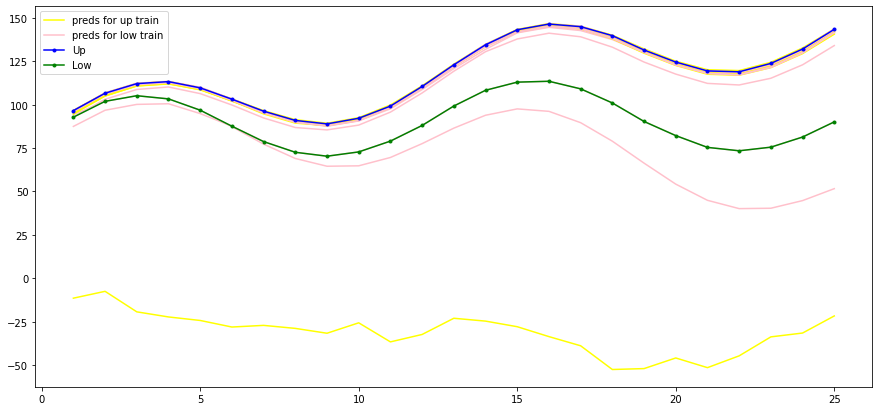

In [31]:
conf_int_plotting(up_predictions = x['up_predictions'],
                  low_predictions = x['low_predictions'],
                  regim='quantile',
                  plot_history = False,
                  plot_up_int = True,
                  plot_low_int = True,
                  plot_trend = False,
                  plot_forecast = False,
                  plot_upper_train = True,
                  plot_lower_train = True,
                  plot_ts_test = False)